### Mushroom Heatmaps
Due to size limitations, we are unable to include m(any) of the above plots in the report.

The following heatmaps show the proportion of rows in the mushrooms dataset exhibiting each pairwise combination of feature values. The heatmaps are largely self-explanatory and some are more informative than others but a few key observations related to the toxicity of mushrooms are noted below:


- The dataset is well balanced with a 48/52 split between poisonous and edible mushrooms.
- Mushrooms with bruises value of "t" tend to be edible, whereas mushrooms with bruises value "f" tend to be poisonous.
- Mushrooms with odor value "n" tend to be edible whereas those with odor "f" tend to be poisonous.
- Mushrooms with gill-size "n" are most likely to be poisonous whereas those with gill size "b" tend to be edible.
- Mushrooms with stalk-surface-above-ring values of "k" tend to be poisonous.
- Mushrooms with stalk-surface-below-ring values of "k" tend to be poisonous.


#### Define function

In [1]:
def heatmap(dataset, save_figure=False):

    # Creates feature-value heatmaps for each feature-pair combination in dataset
    # dataset is a Pandas DataFrame and must contain only categorical fields
    
    import os
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Create plots directory if required
    if save_figure and not os.path.exists('plots'):
        os.mkdir('plots')

    # Create dictionary of valid values for each feature
    valid_values = {}
    for field in dataset.keys():
        values = dataset[field].unique()
        valid_values[field] = values

    # Count occurences of feature-value combinations for every pairing of features
    # For each pairing of features, create dataframe containing proportion of records with each feature-value combination 
    # Display dataframe data in heatmap
    for i in dataset.keys():
        for j in [j for j in dataset.keys() if dataset.keys().to_list().index(j) > dataset.keys().to_list().index(i)]:
            heatmap = pd.DataFrame(index=valid_values[i], columns=valid_values[j])
            for k in valid_values[i]:
                for l in valid_values[j]:
                    heatmap.loc[k, l] = dataset[(dataset[i] == k) & (dataset[j] == l)].count()[0]
            heatmap = heatmap / heatmap.sum().sum()
            heatmap = heatmap.astype(float).round(3)
            colormap = sns.cubehelix_palette(as_cmap=True)
            fig, ax = plt.subplots(figsize=(8,6)) 
            ax = sns.heatmap(heatmap, annot = True, cmap=colormap, vmin=0, vmax=1)
            ax.set_xlabel(j, size=16)
            ax.set_ylabel(i, size=16)
            ax.set_autoscalex_on(True)
            ax.set_title('{} versus {}'.format(j,i), size=20)
            plt.savefig('plots/heatmap {} v {}'.format(i,j))
            plt.show()


#### Generate Plots

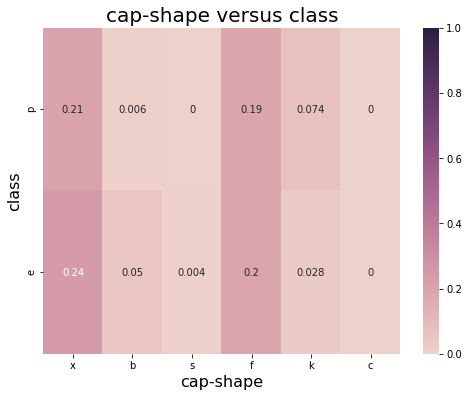

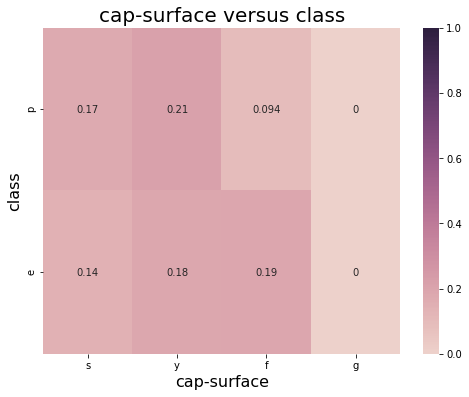

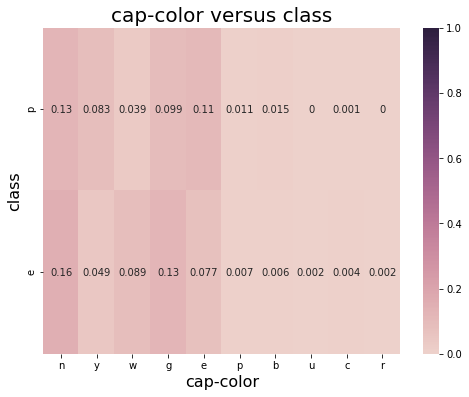

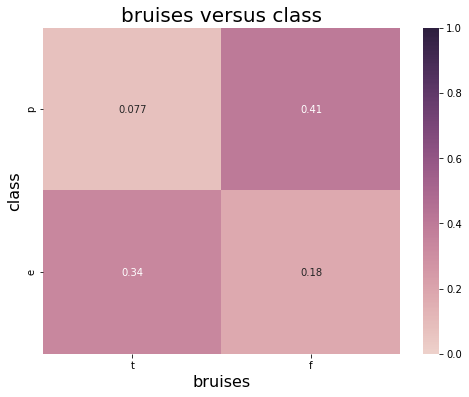

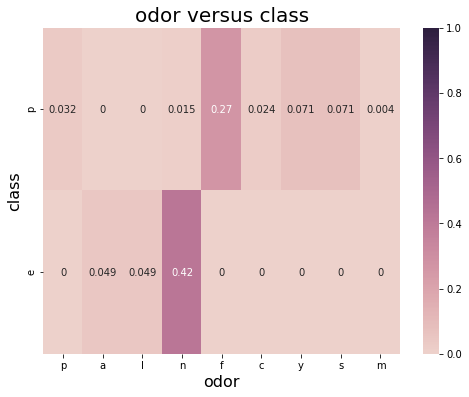

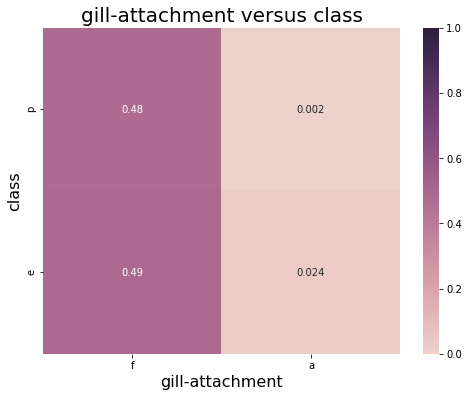

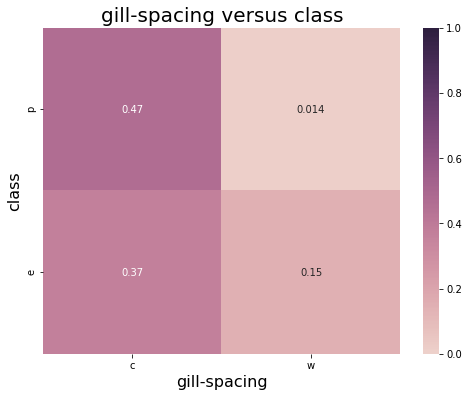

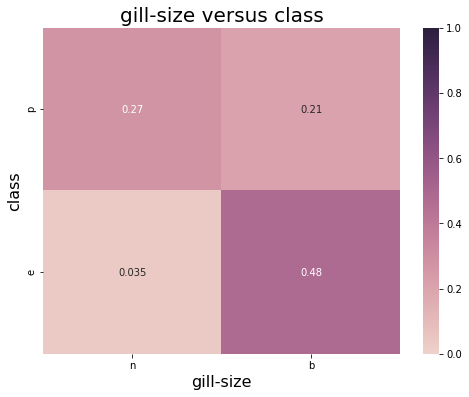

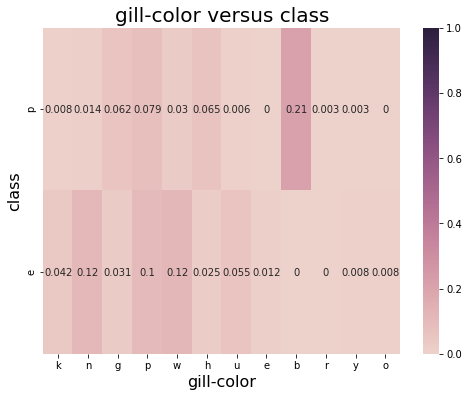

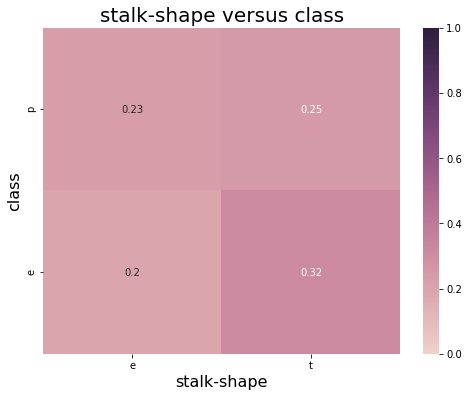

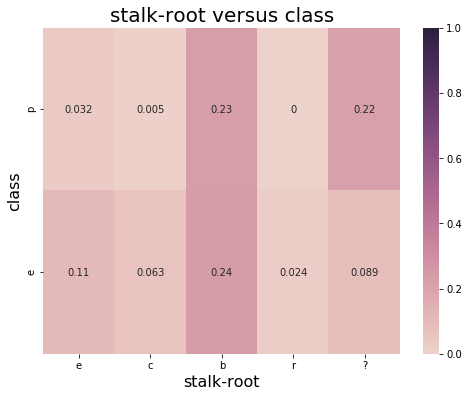

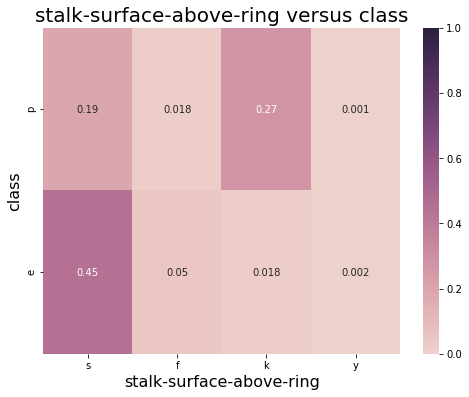

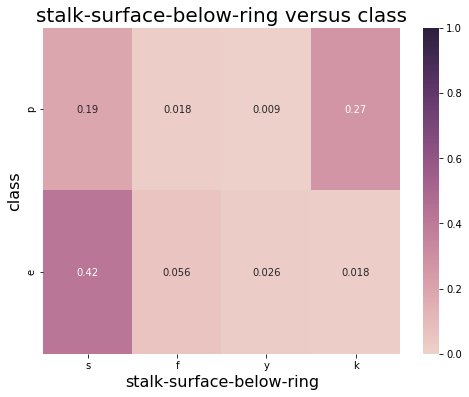

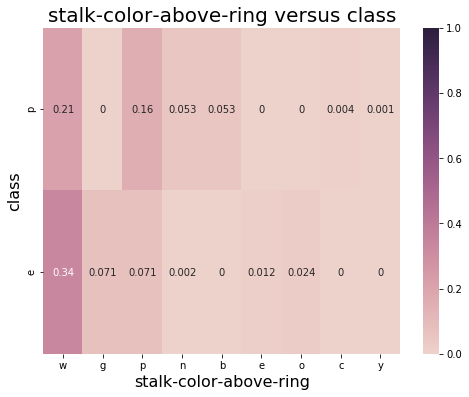

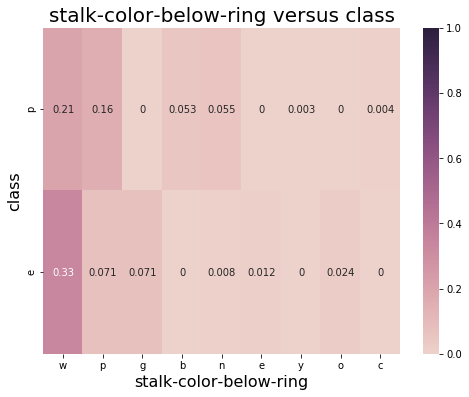

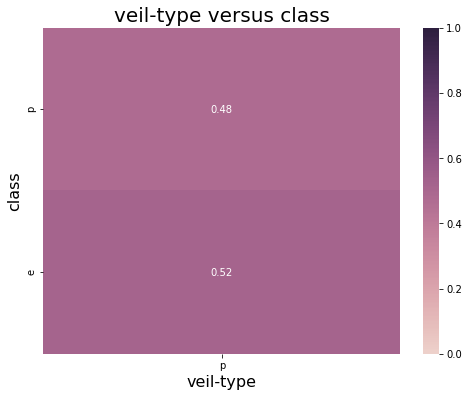

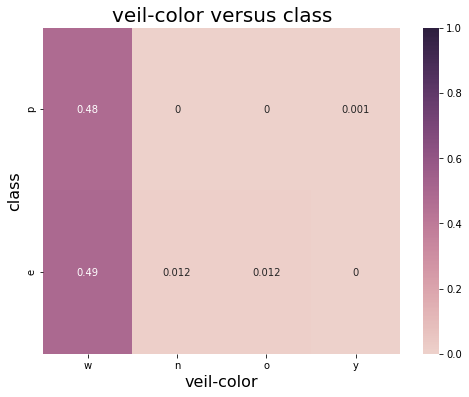

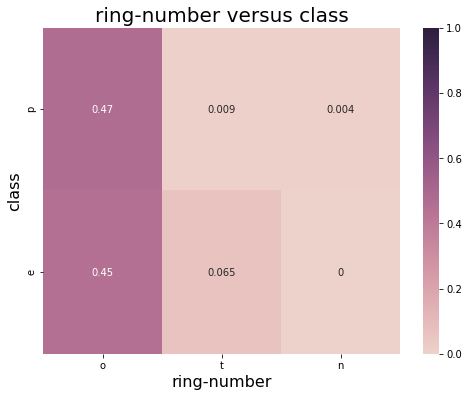

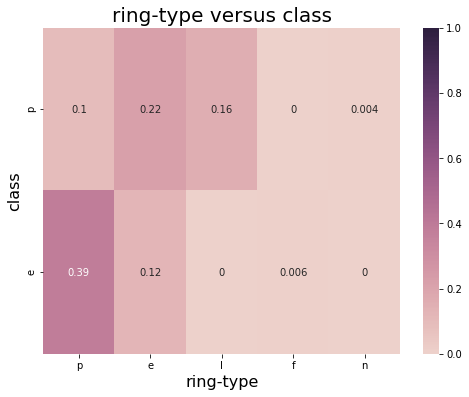

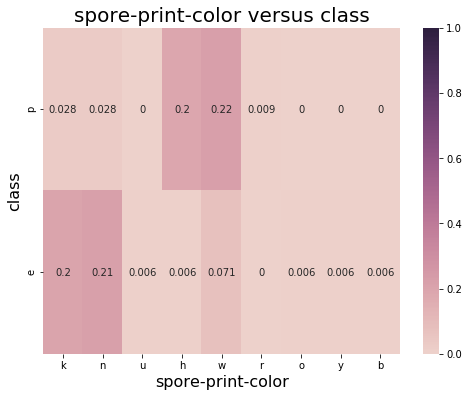

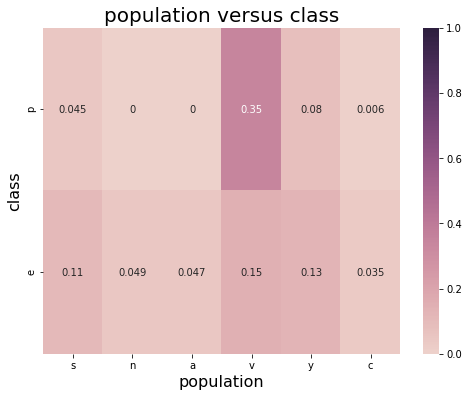

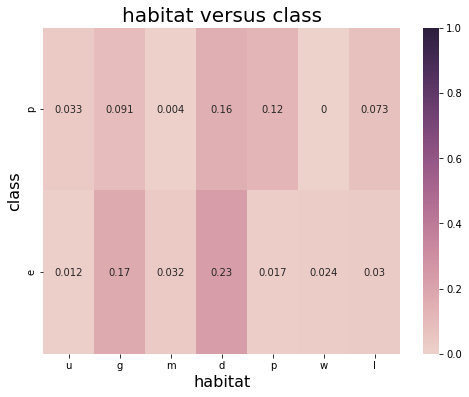

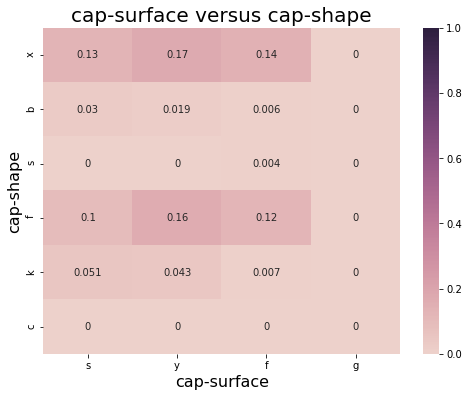

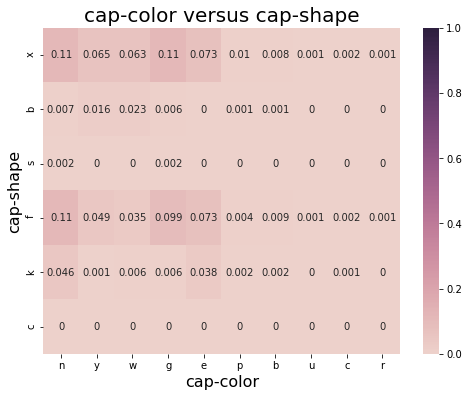

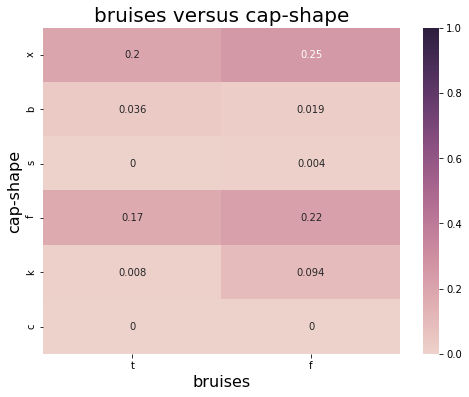

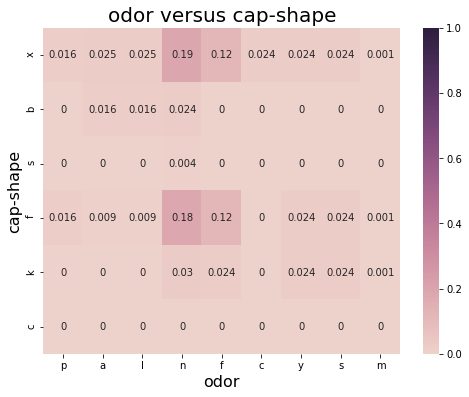

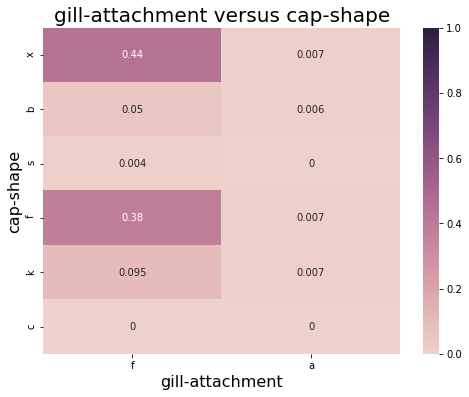

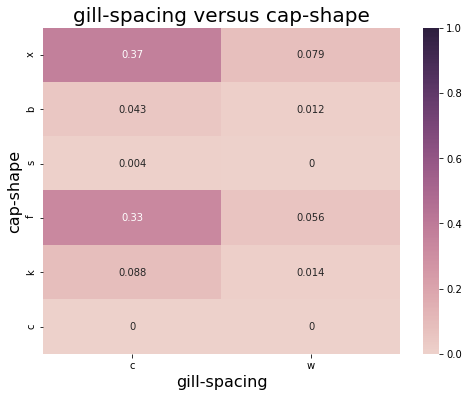

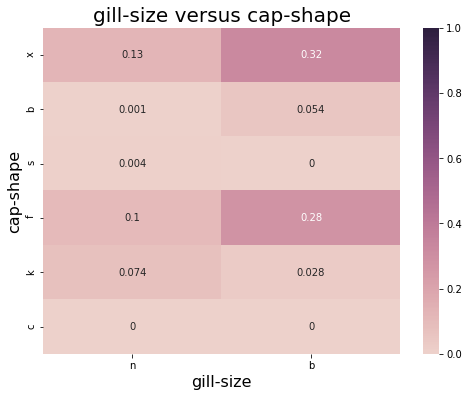

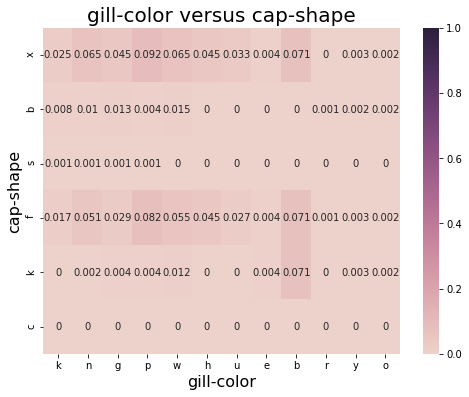

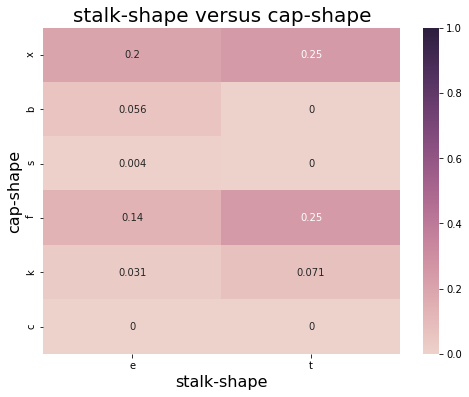

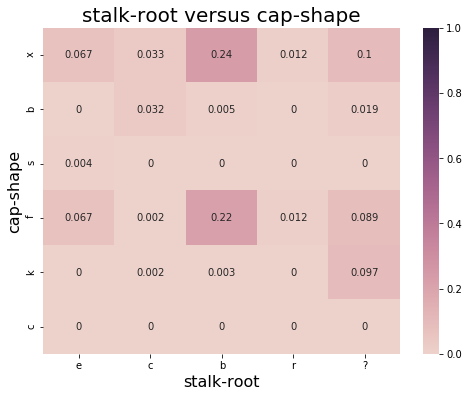

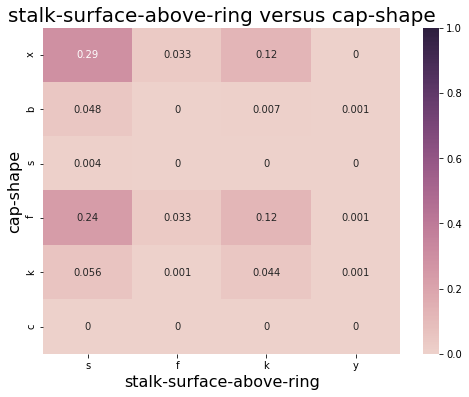

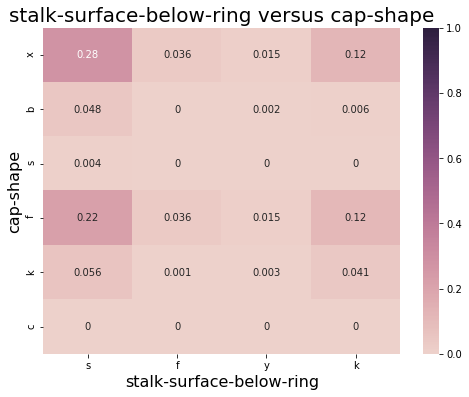

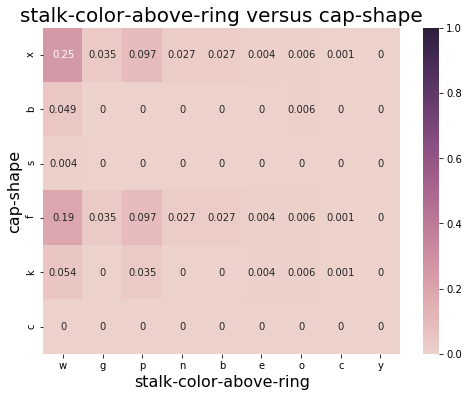

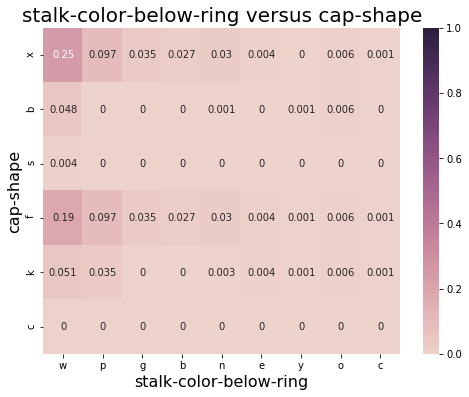

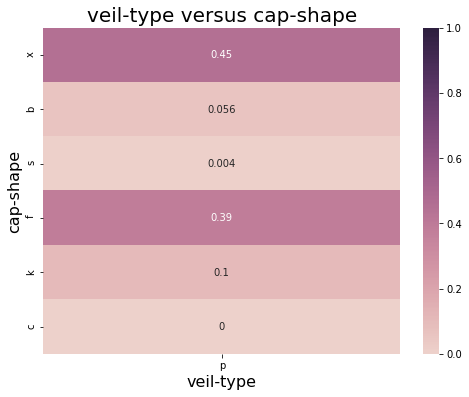

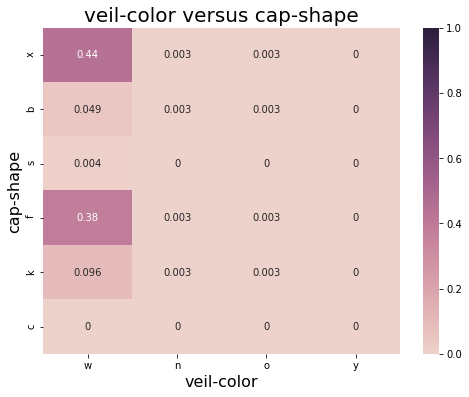

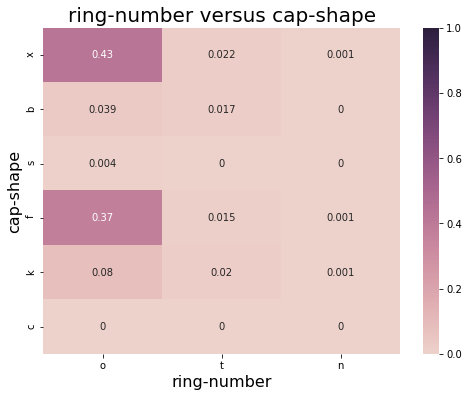

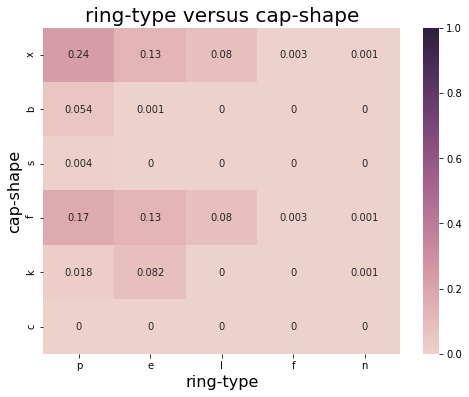

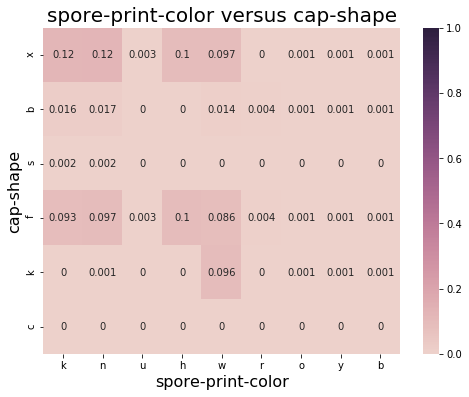

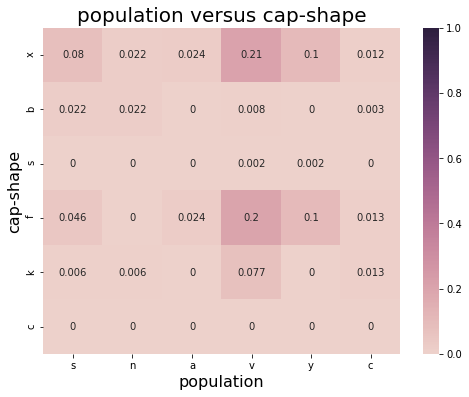

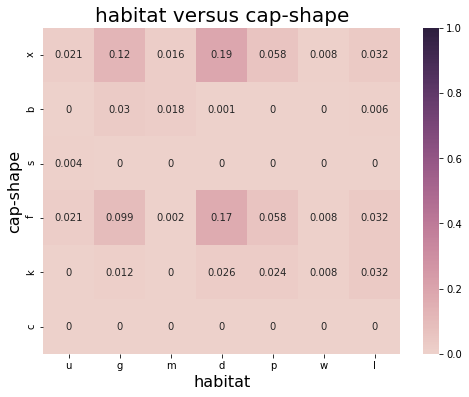

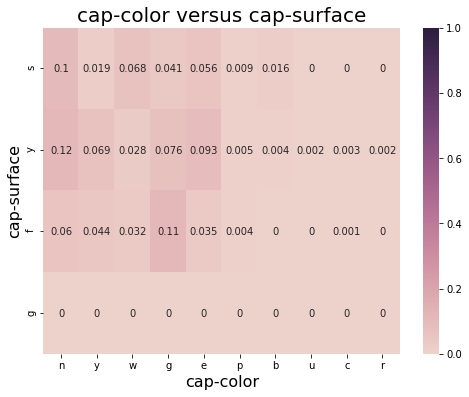

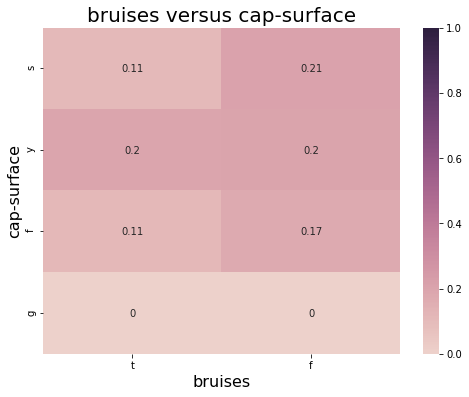

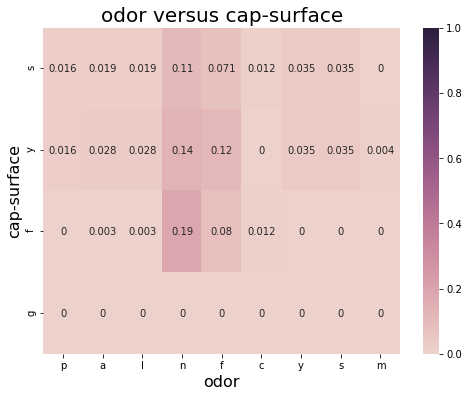

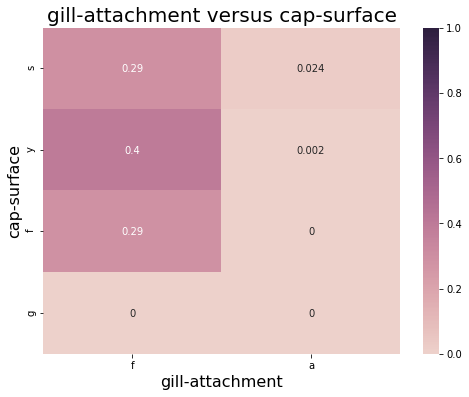

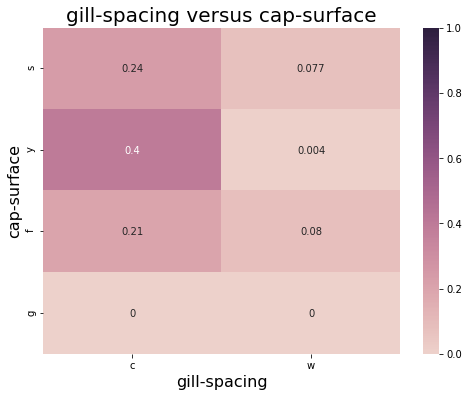

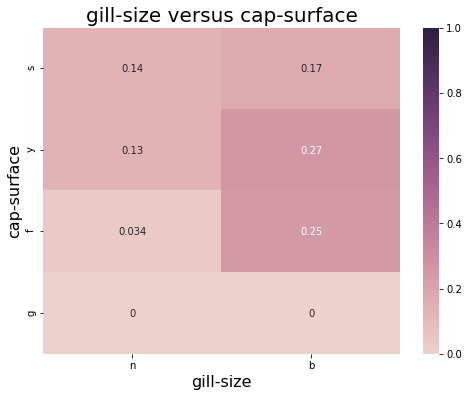

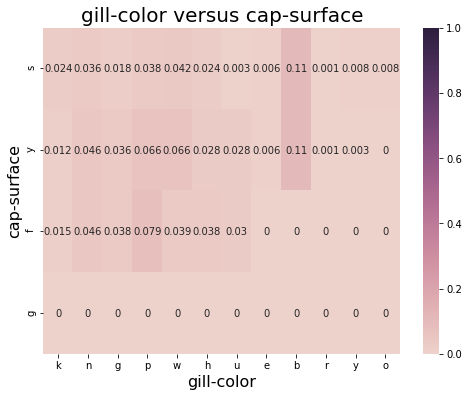

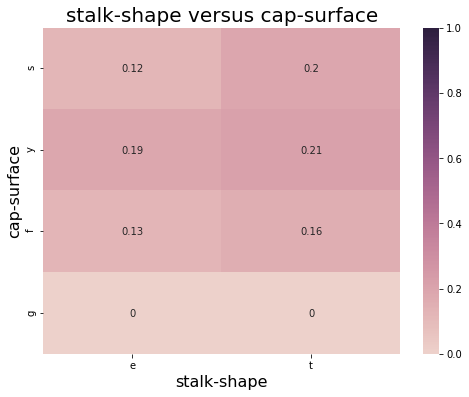

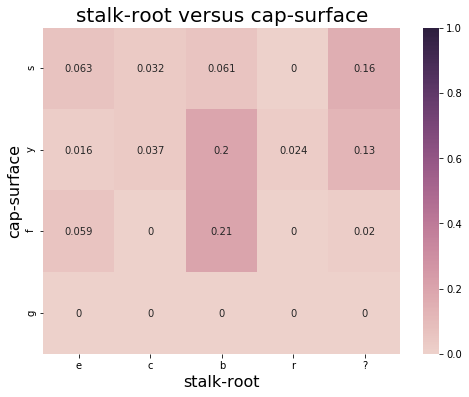

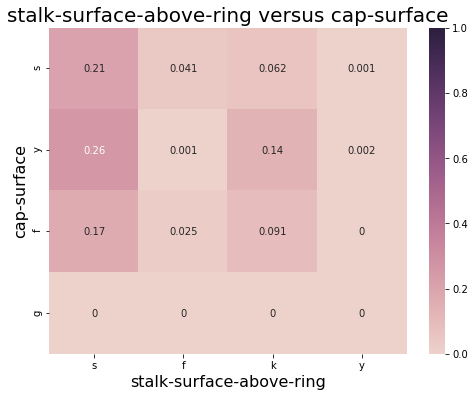

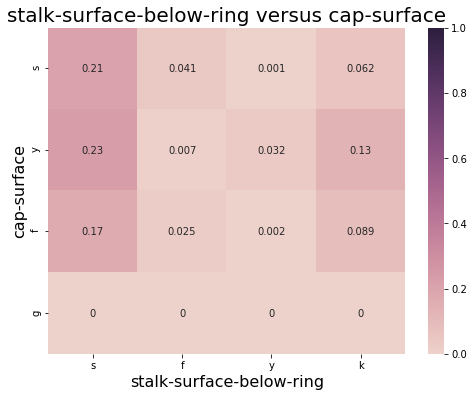

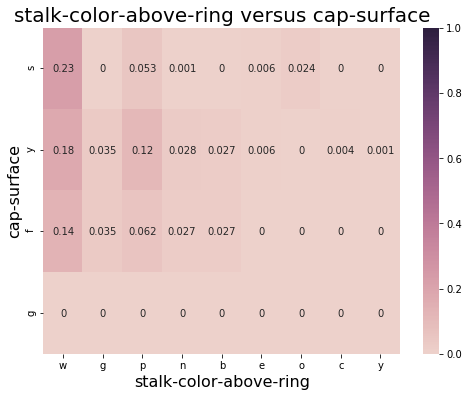

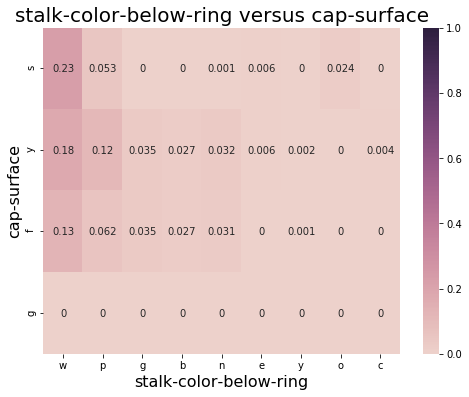

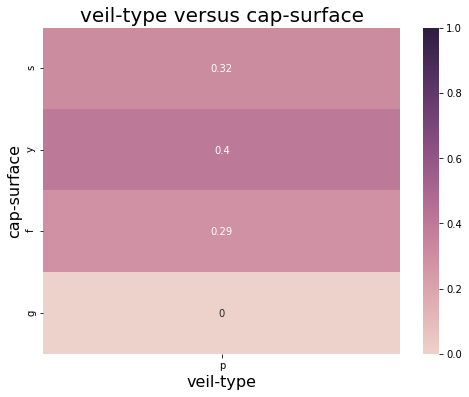

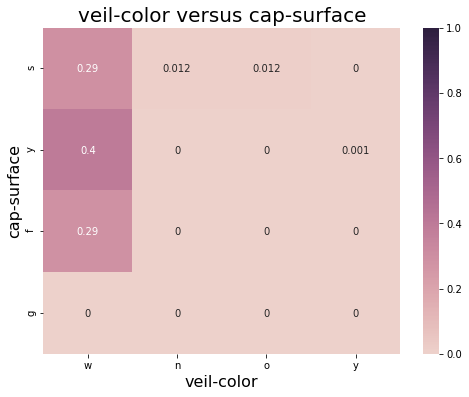

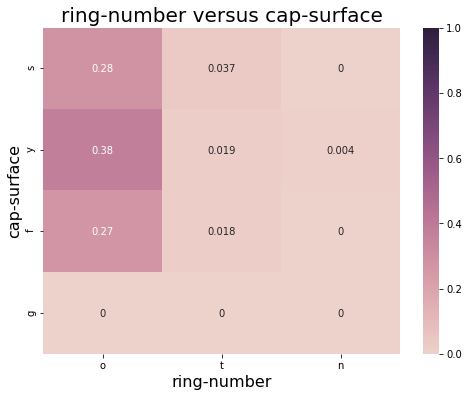

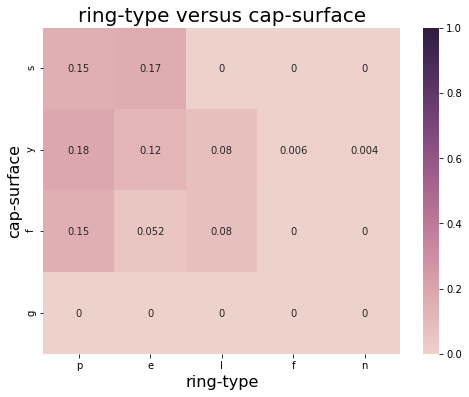

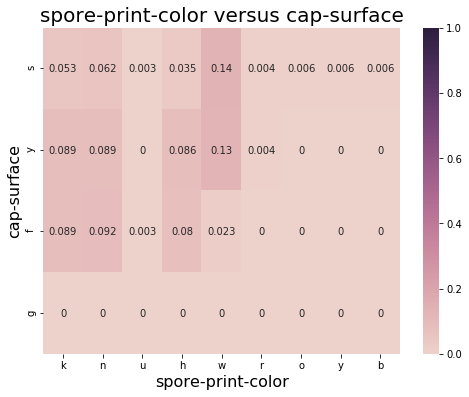

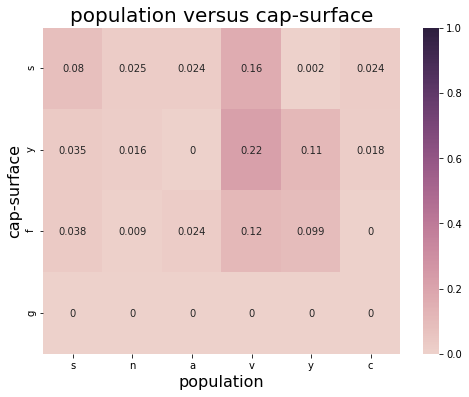

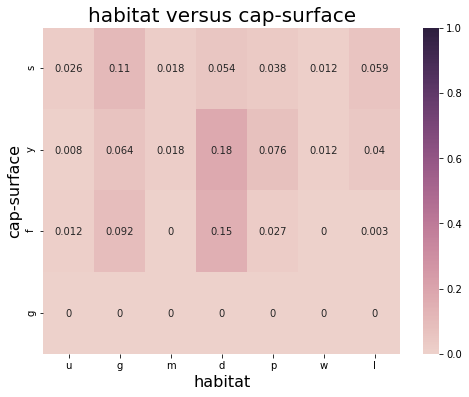

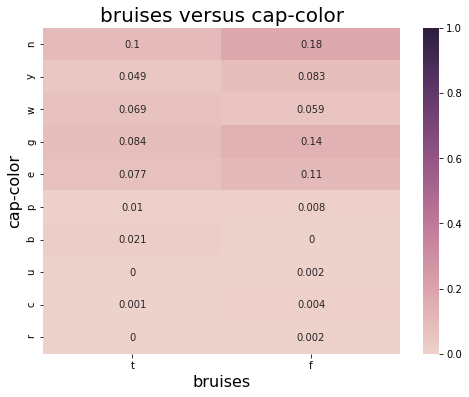

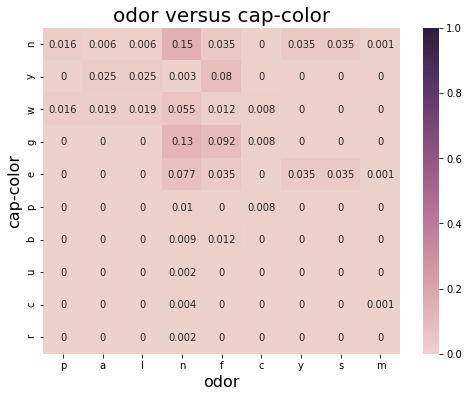

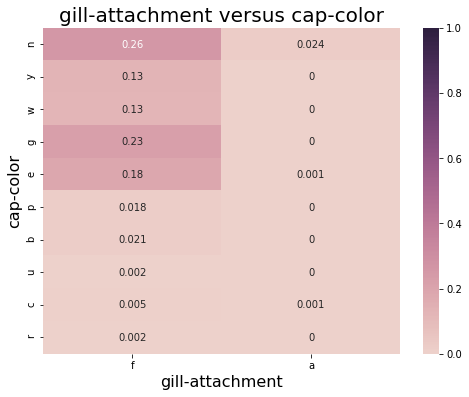

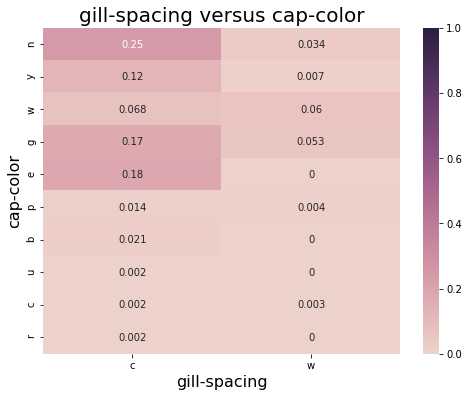

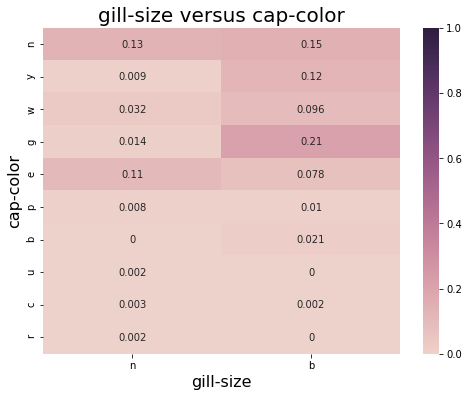

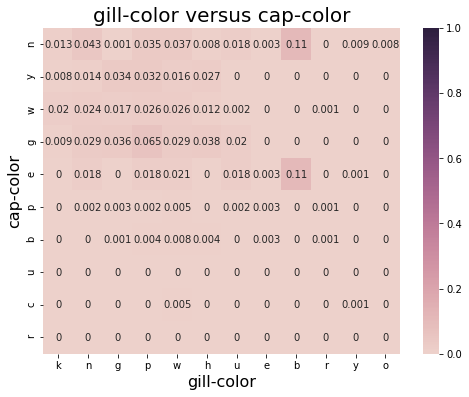

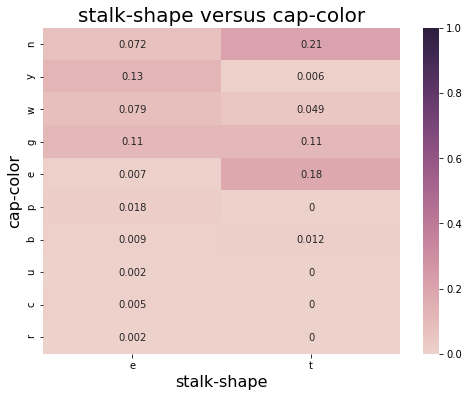

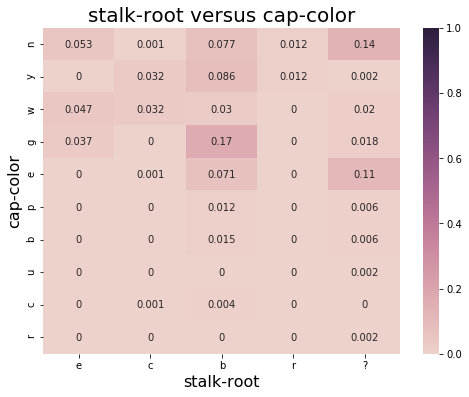

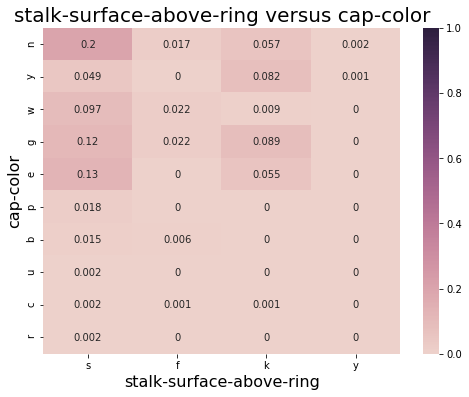

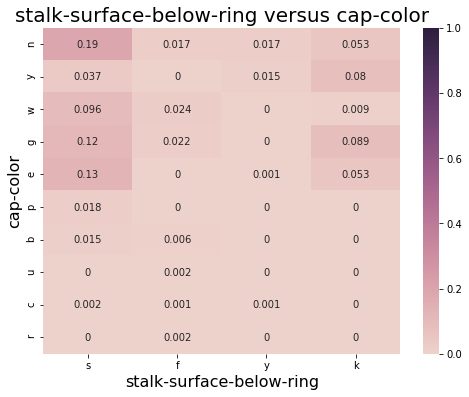

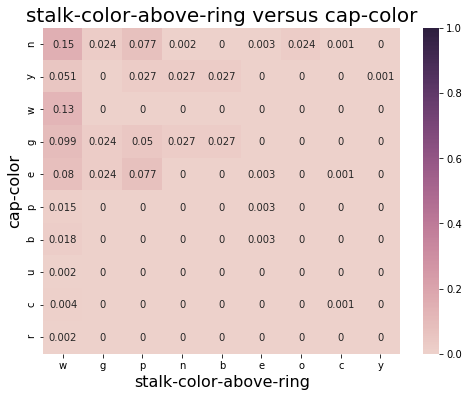

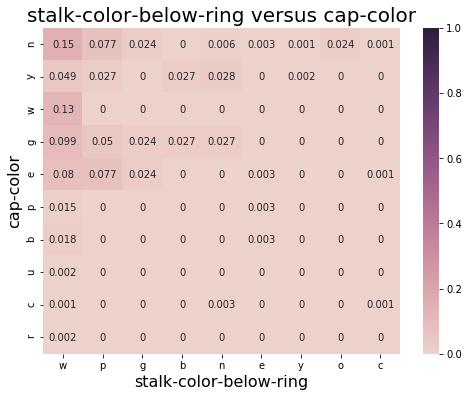

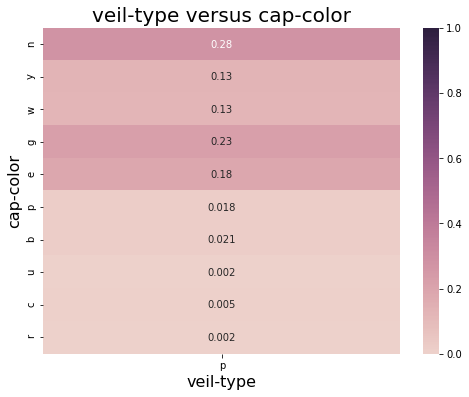

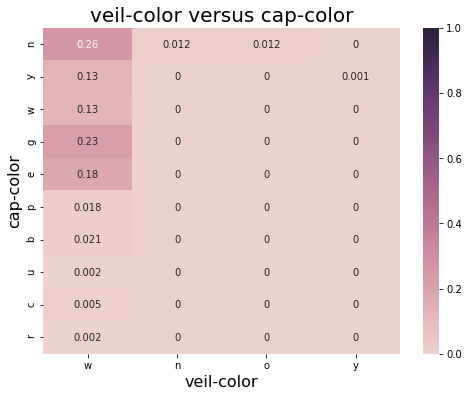

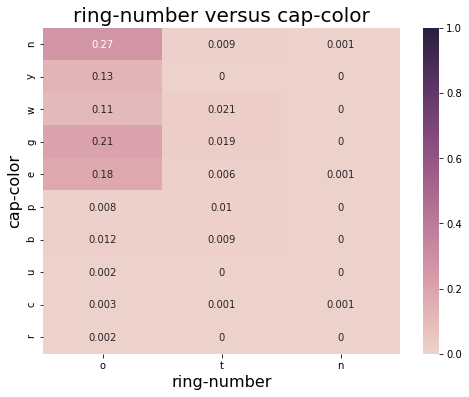

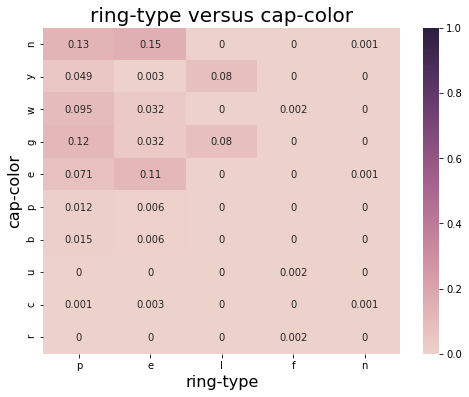

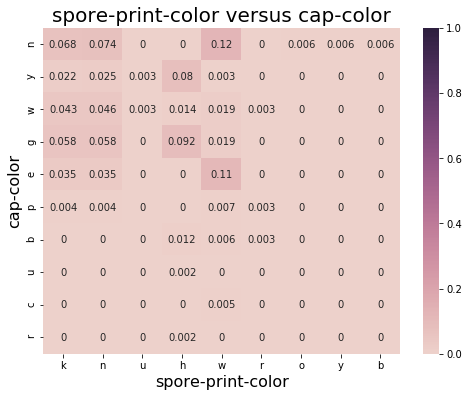

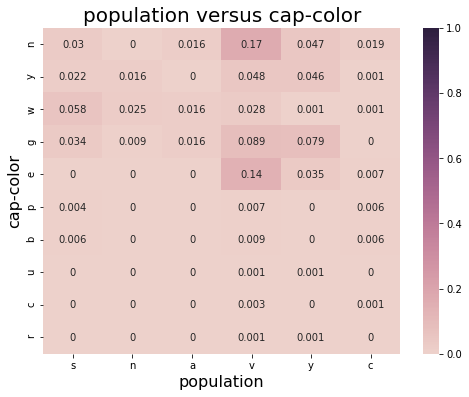

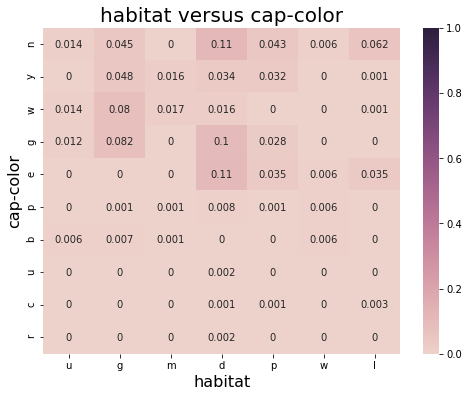

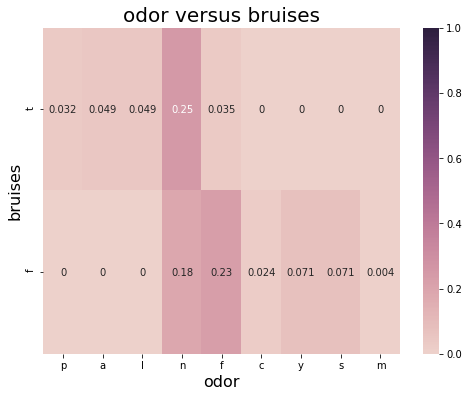

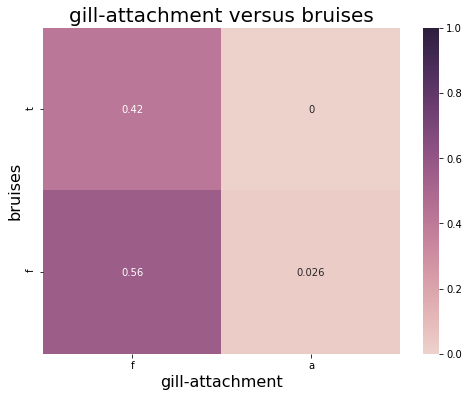

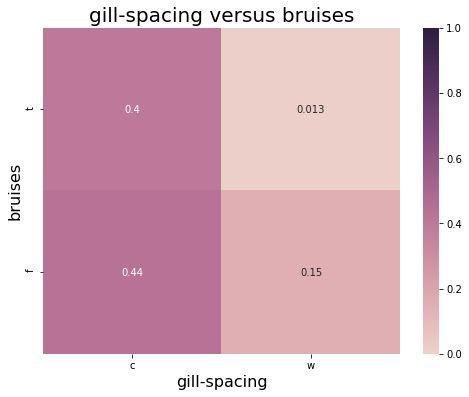

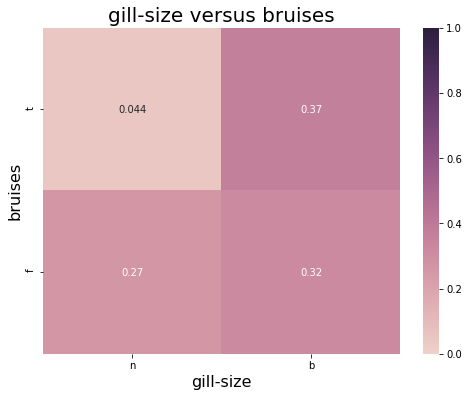

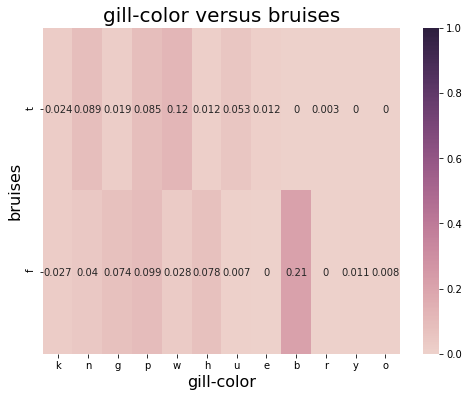

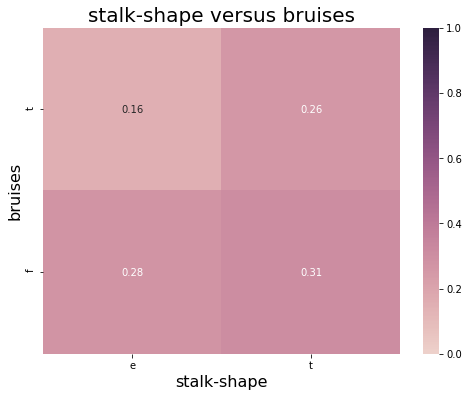

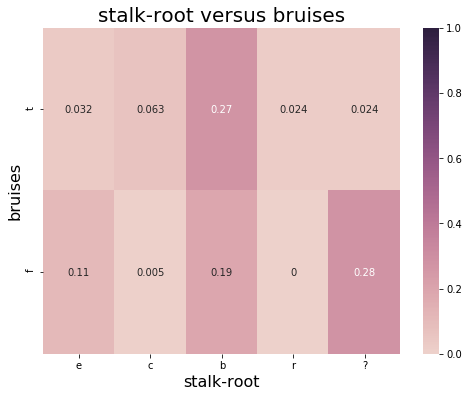

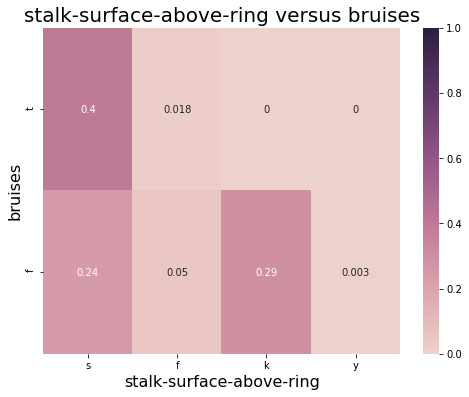

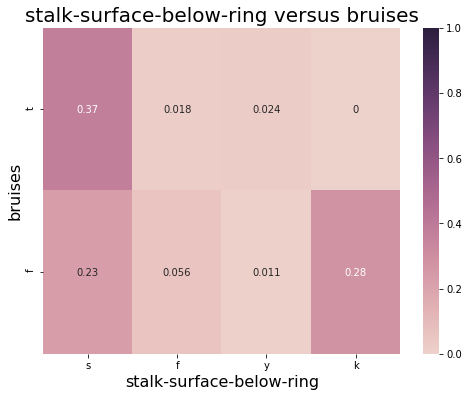

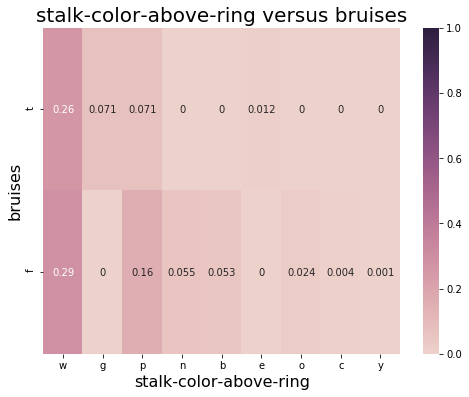

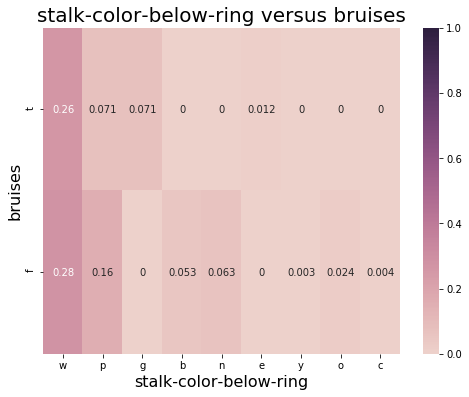

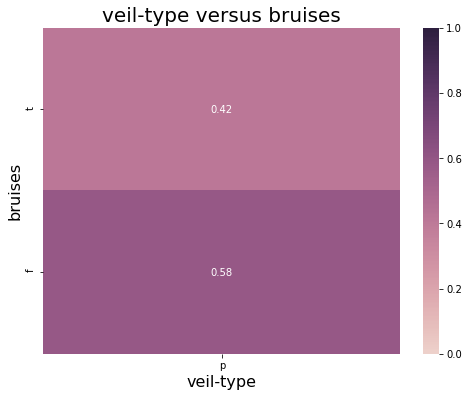

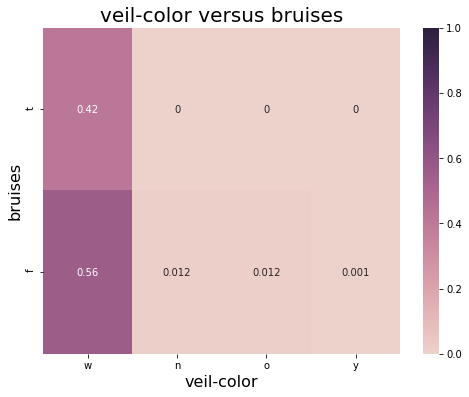

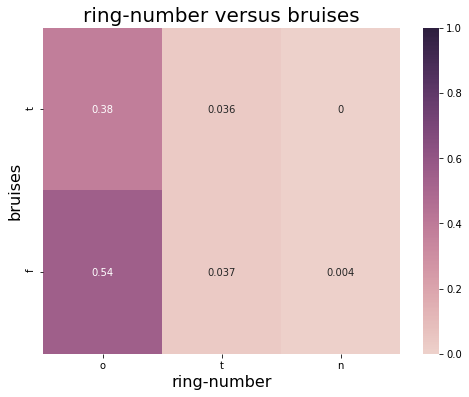

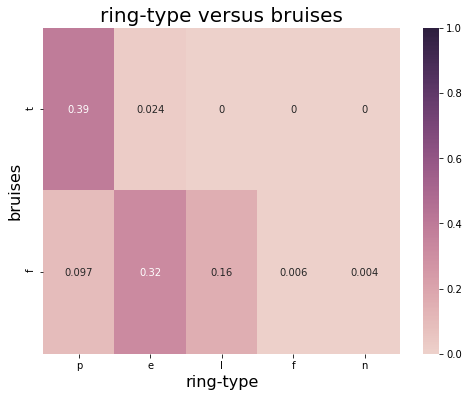

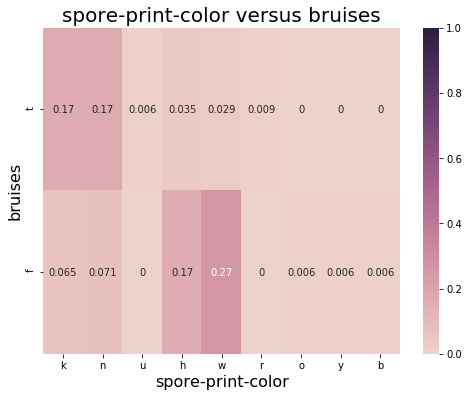

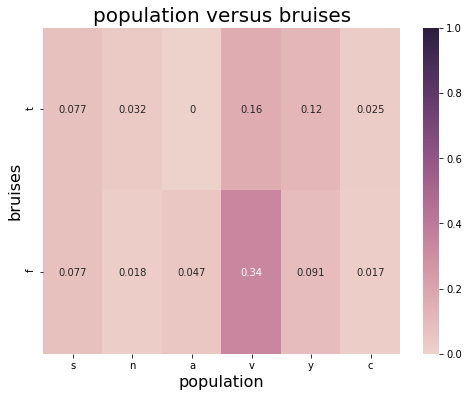

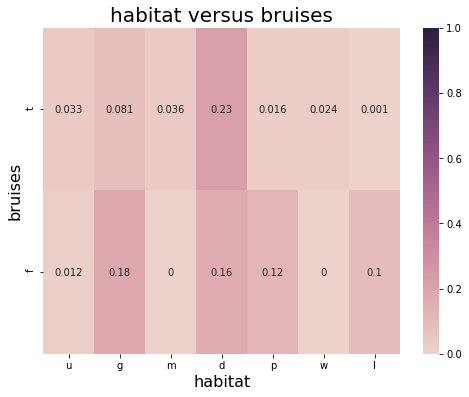

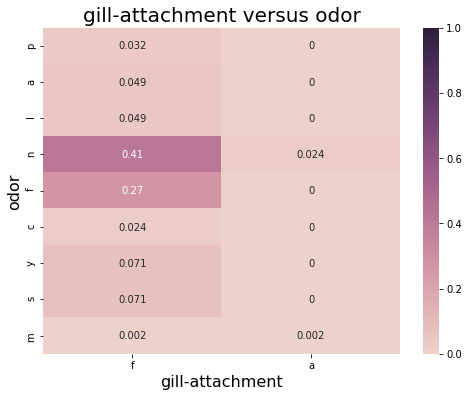

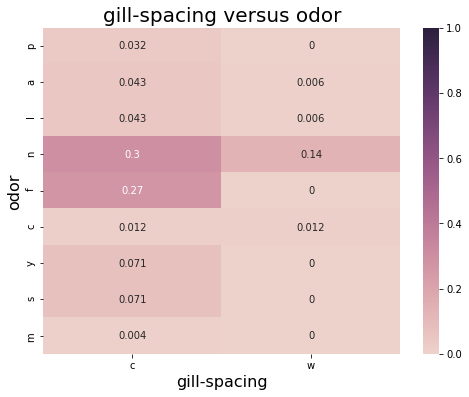

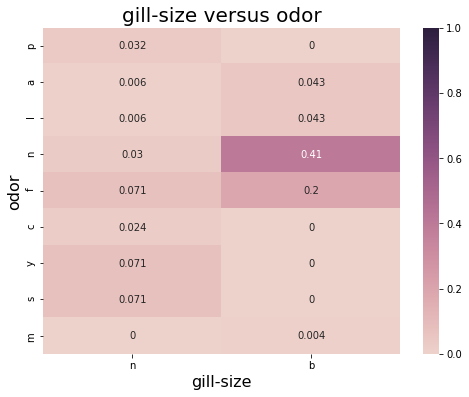

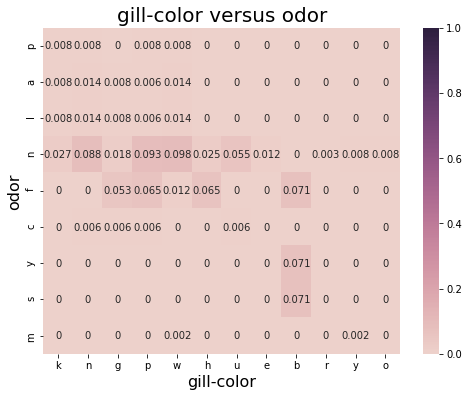

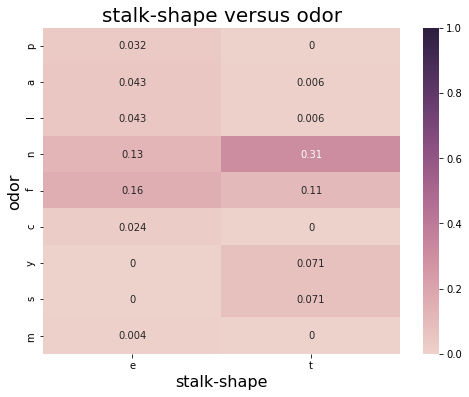

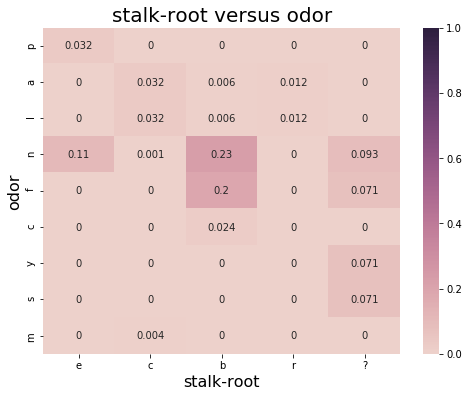

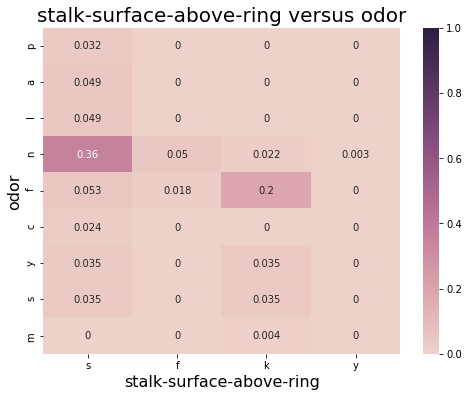

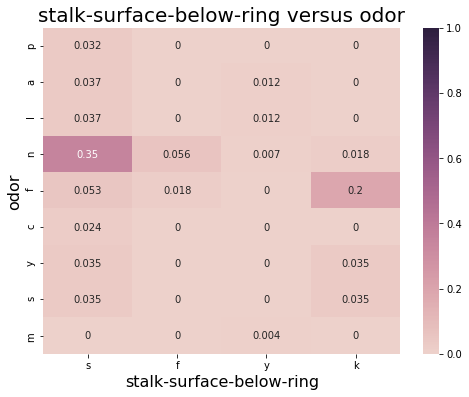

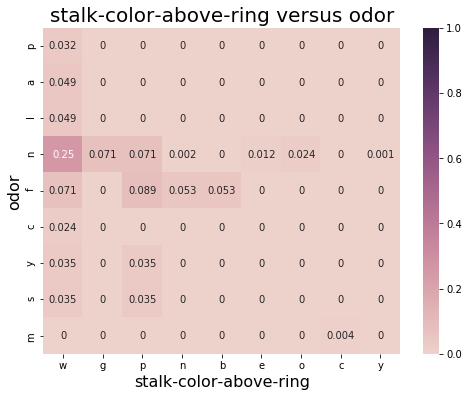

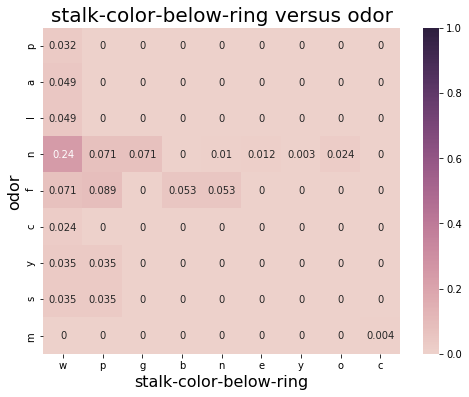

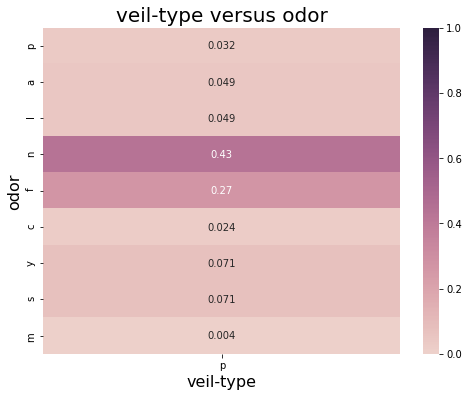

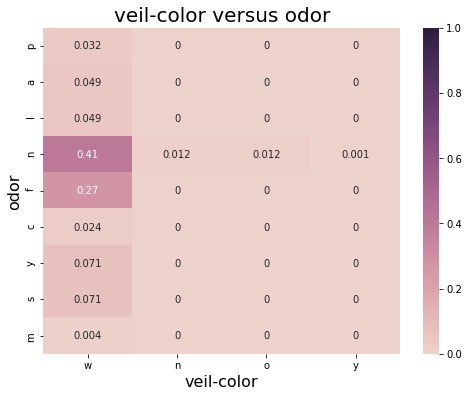

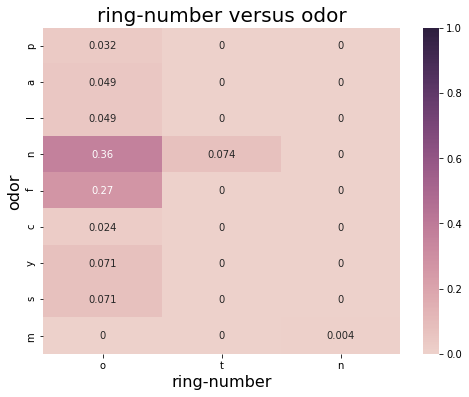

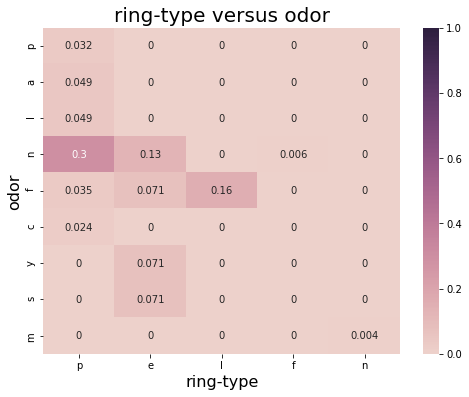

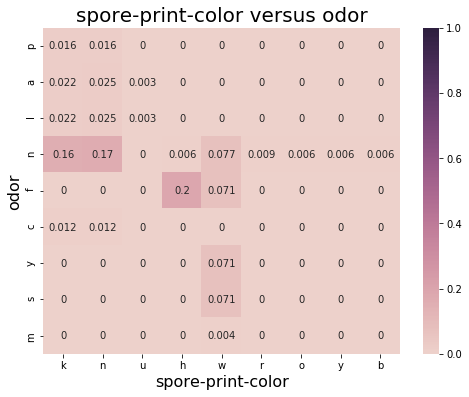

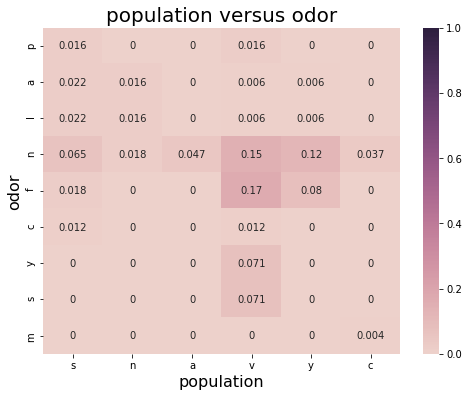

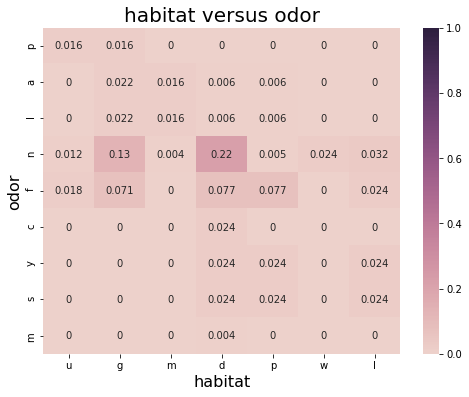

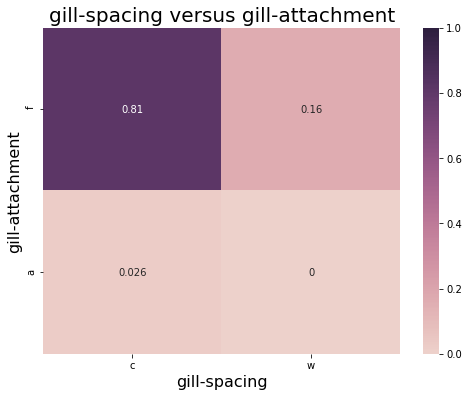

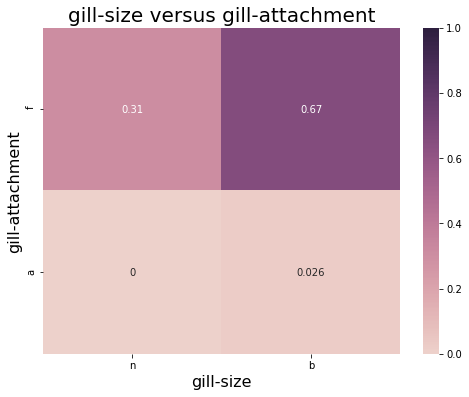

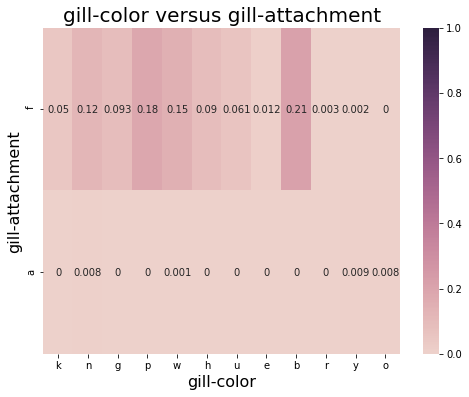

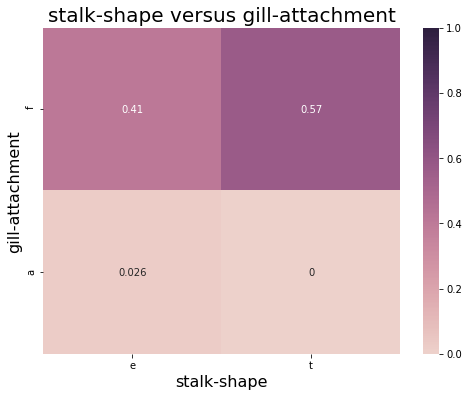

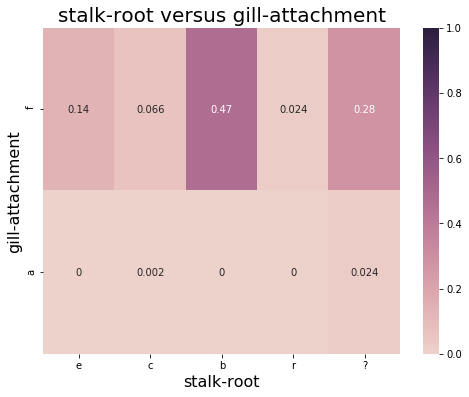

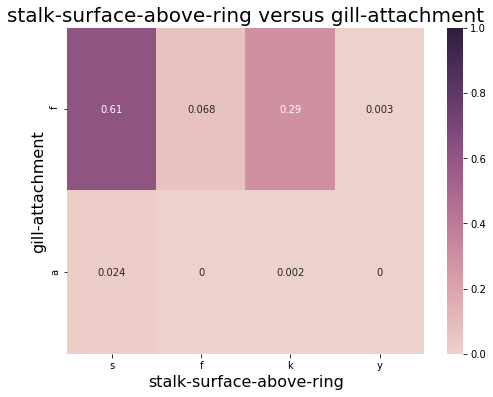

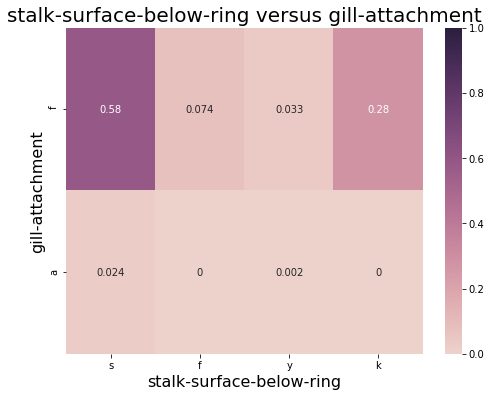

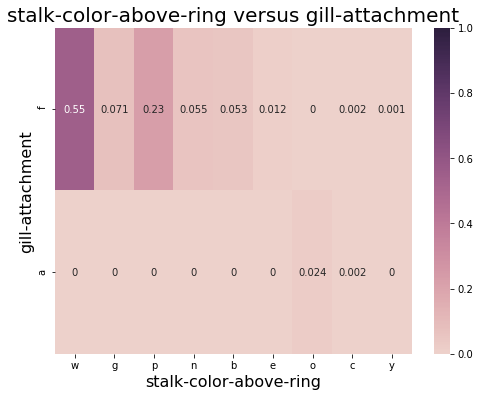

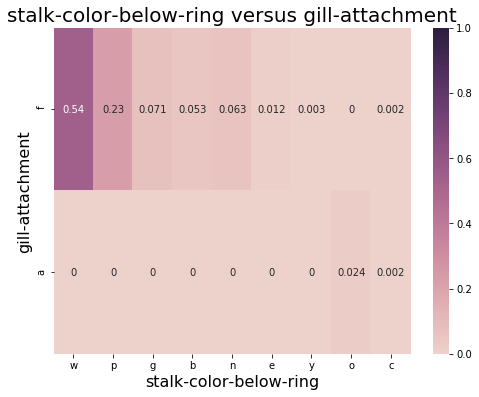

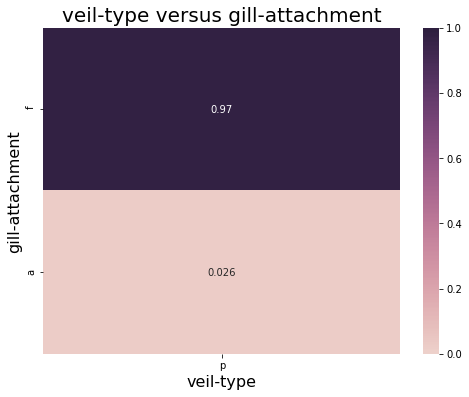

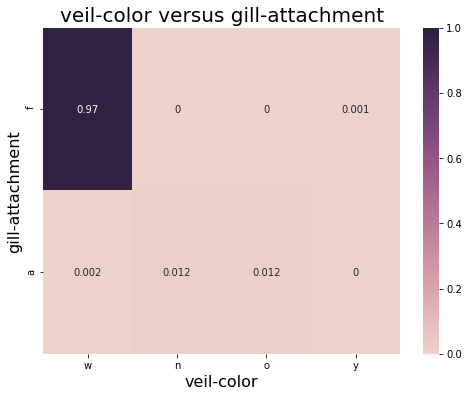

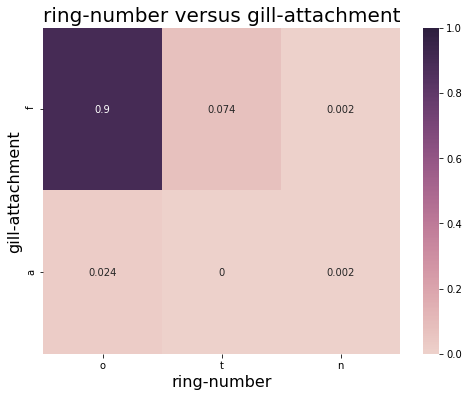

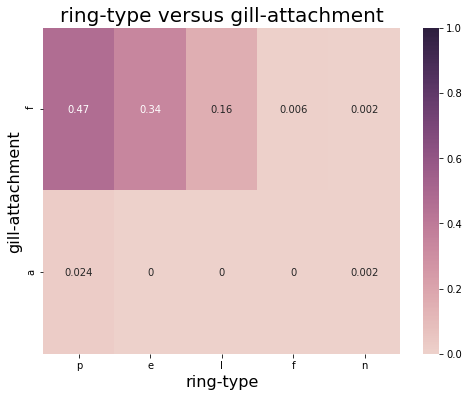

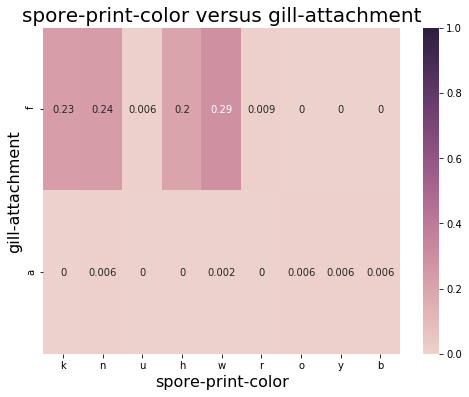

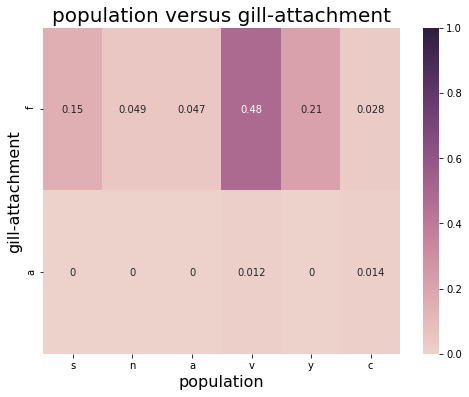

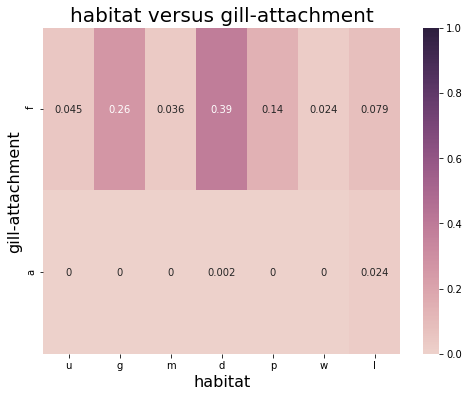

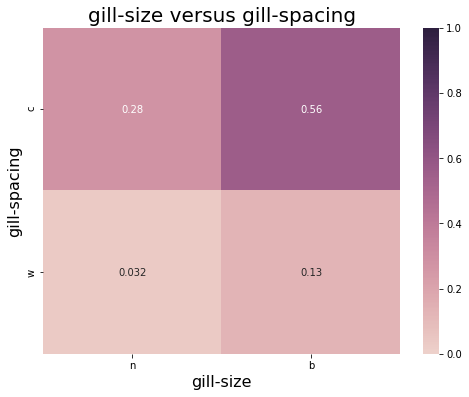

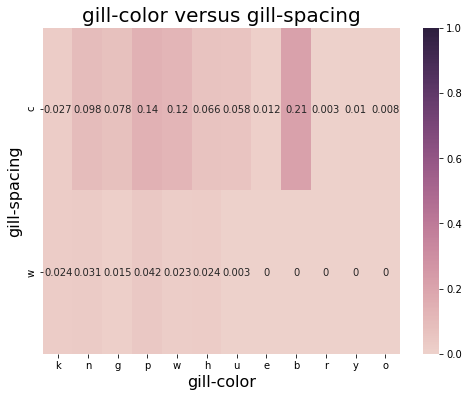

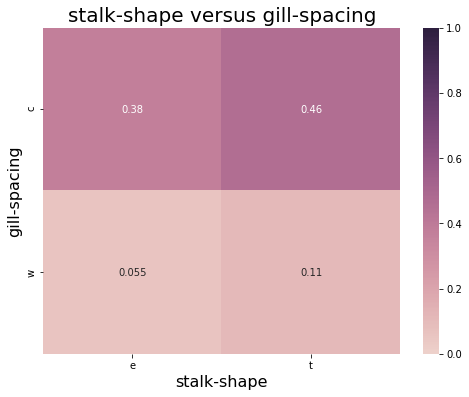

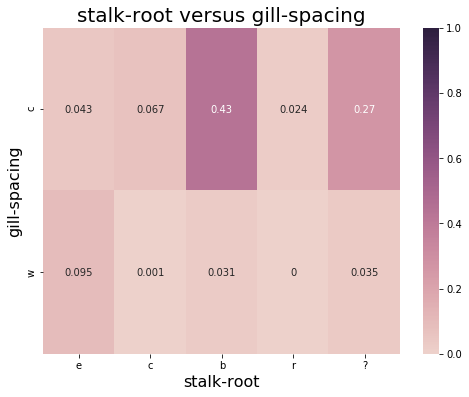

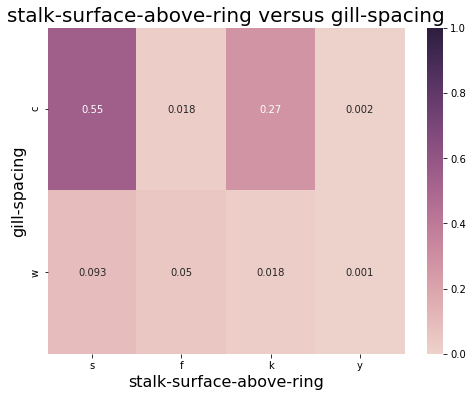

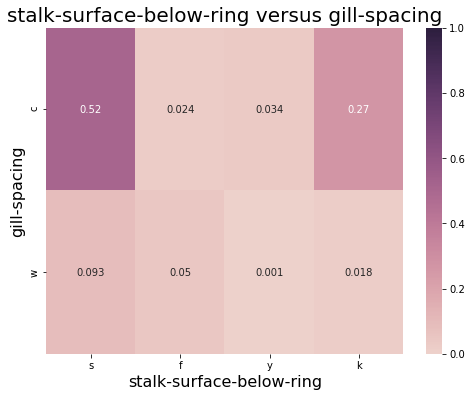

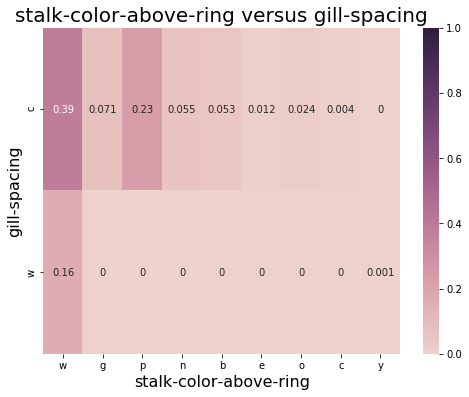

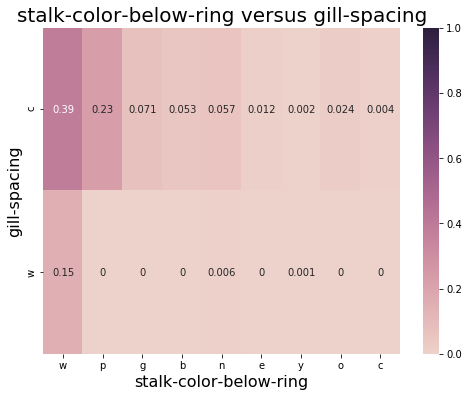

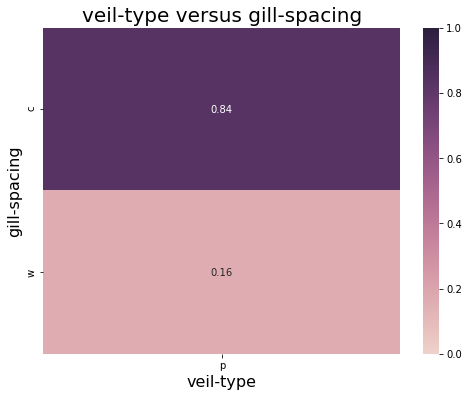

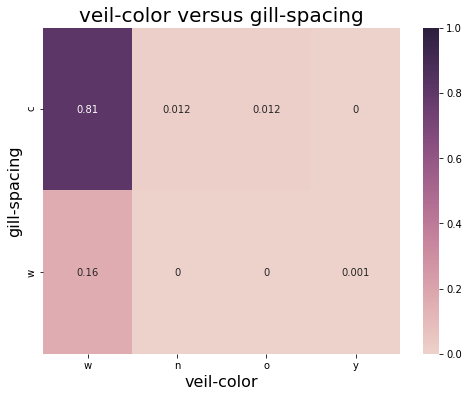

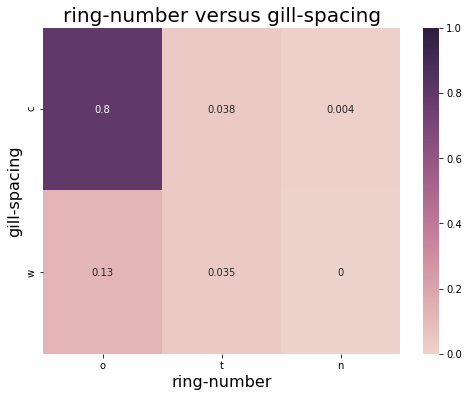

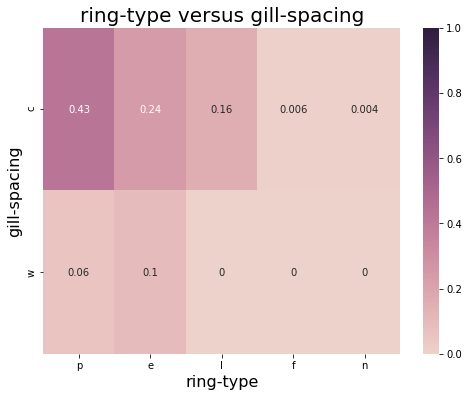

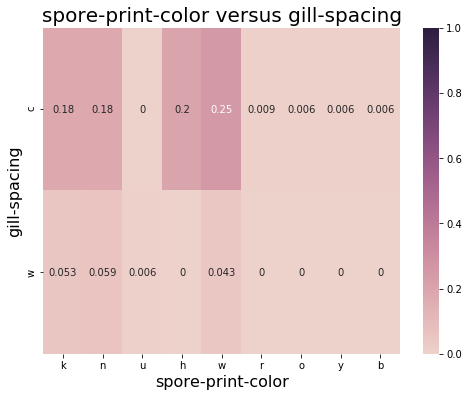

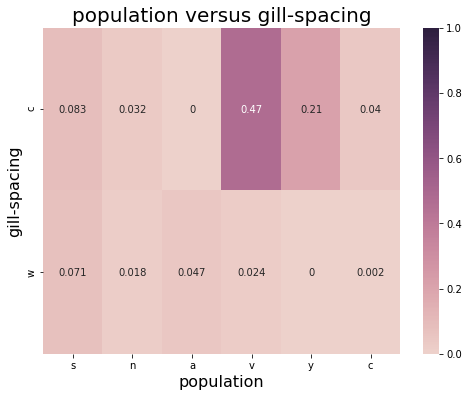

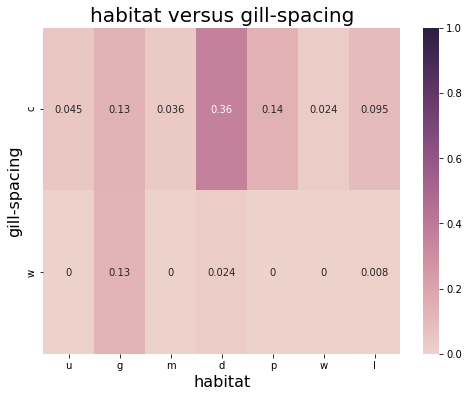

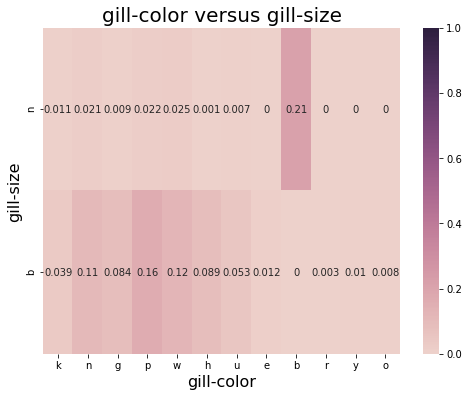

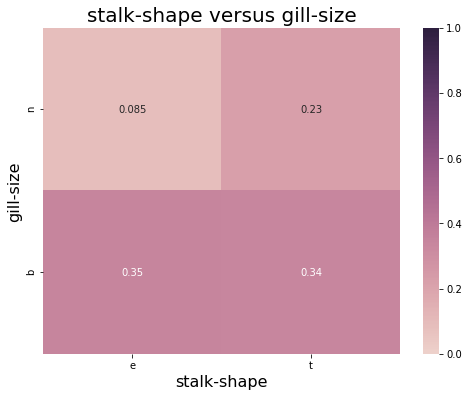

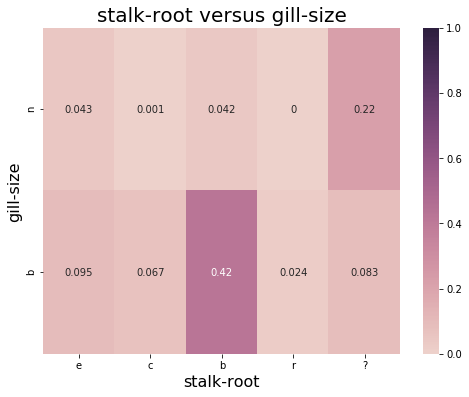

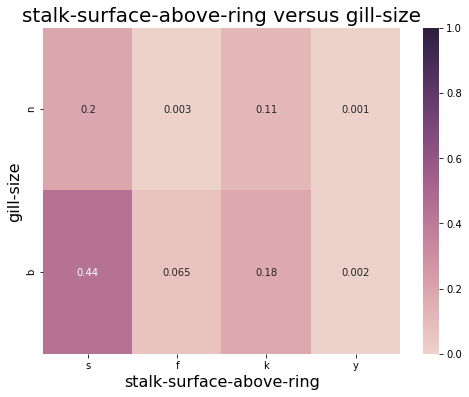

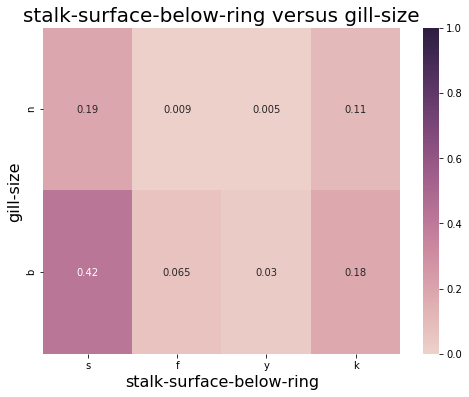

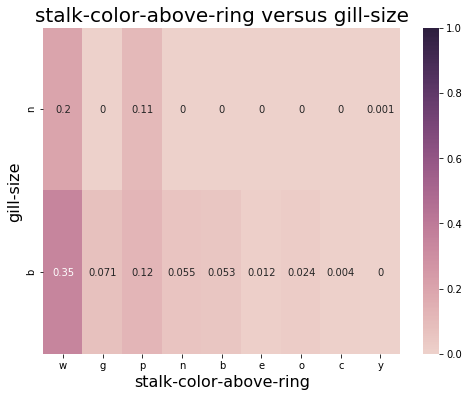

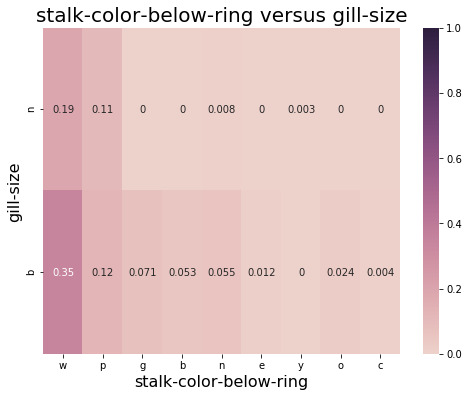

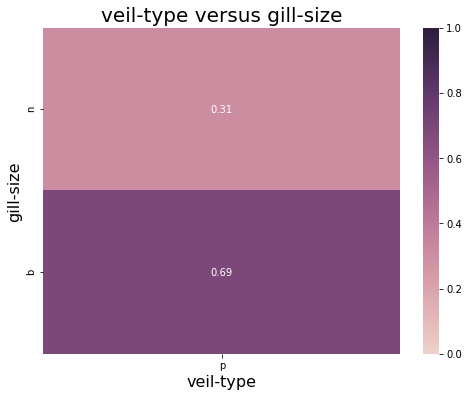

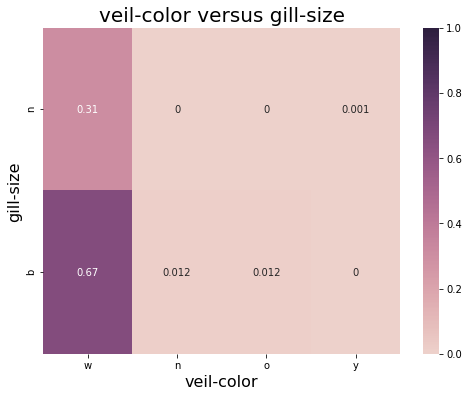

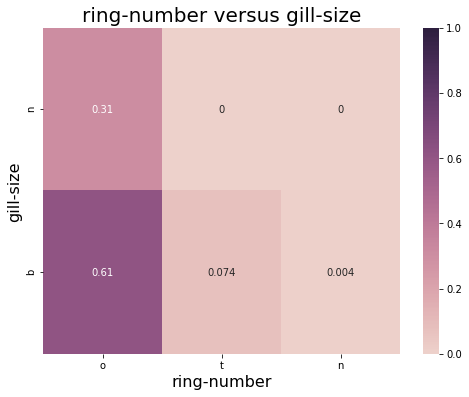

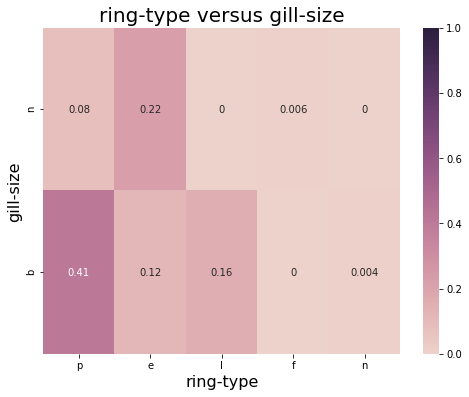

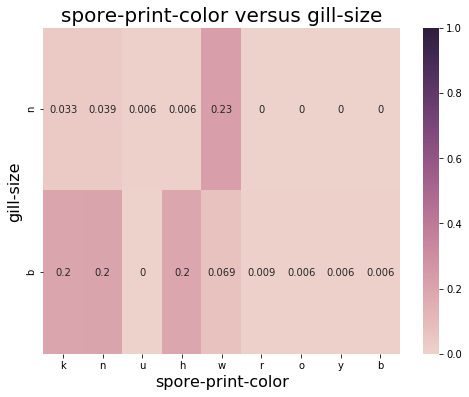

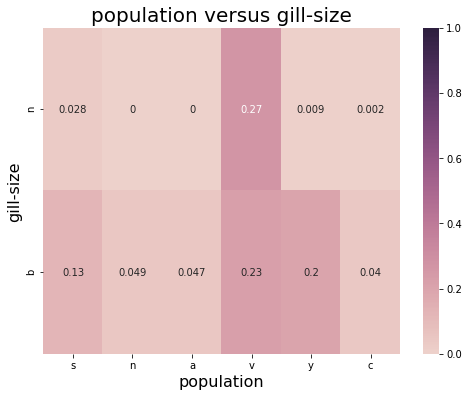

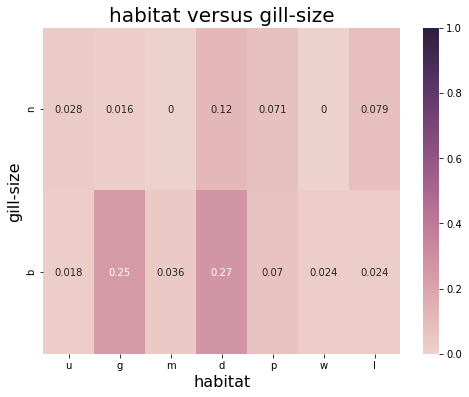

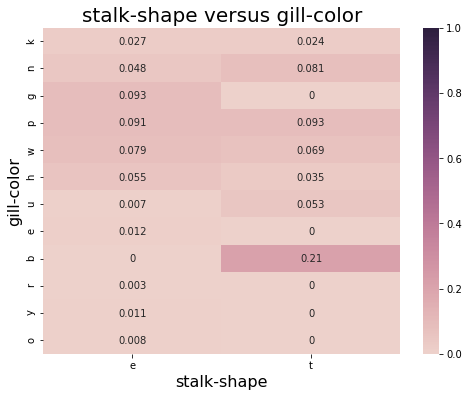

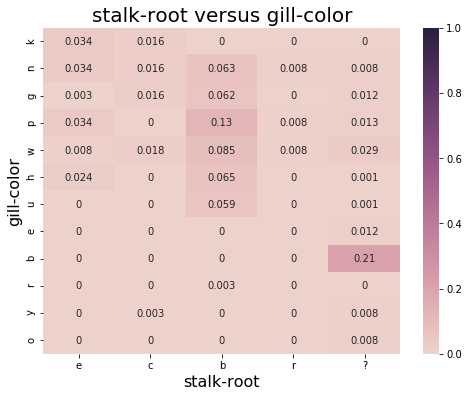

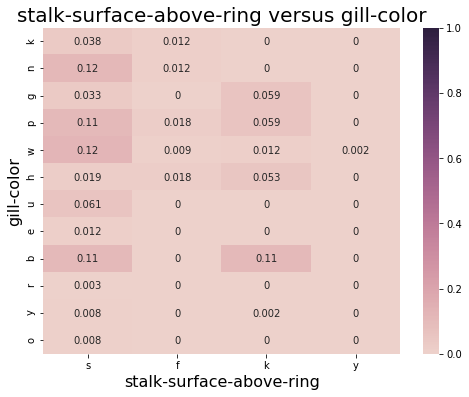

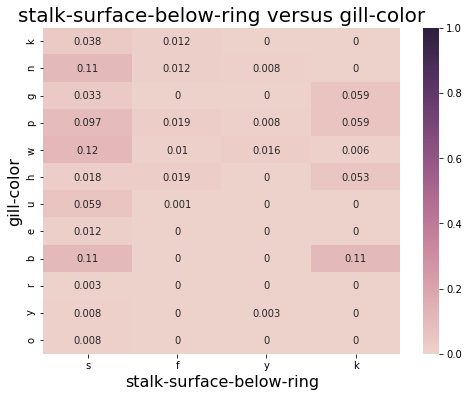

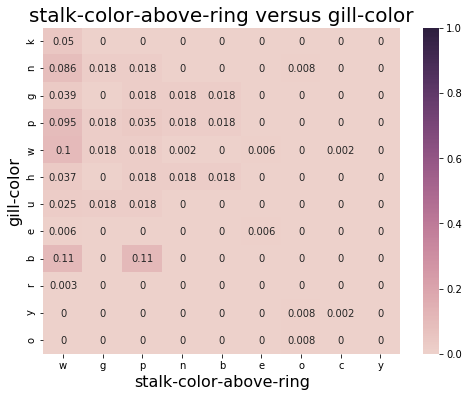

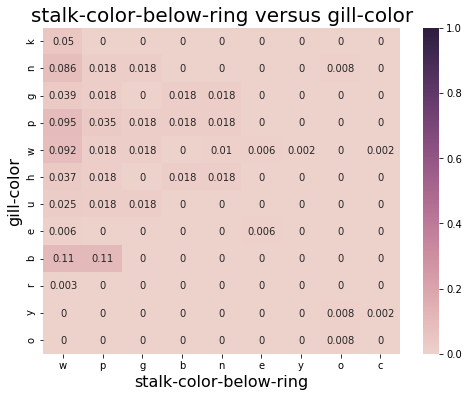

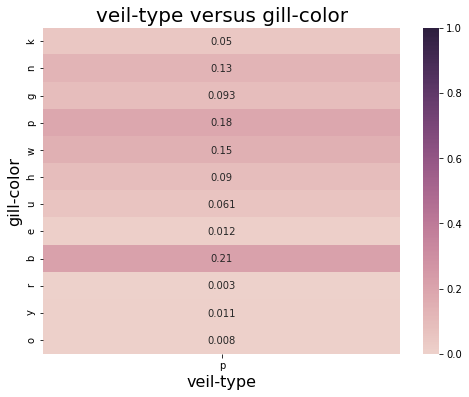

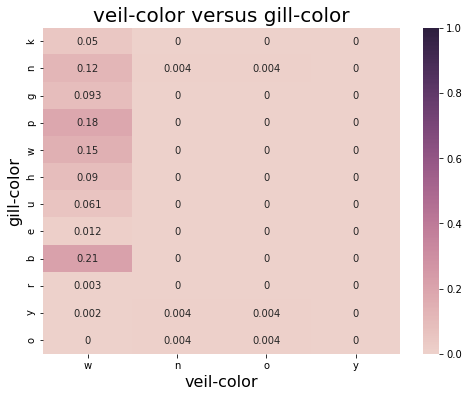

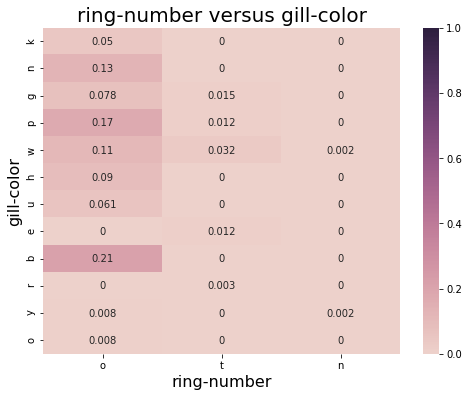

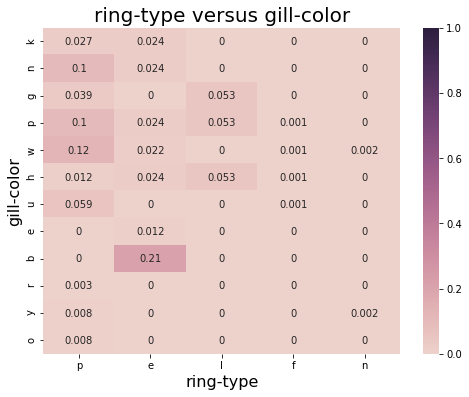

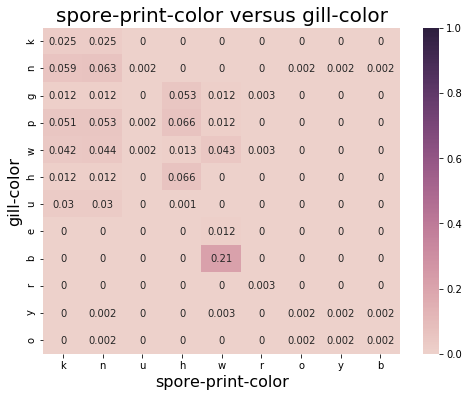

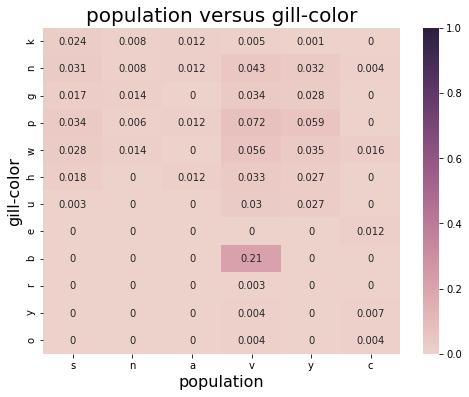

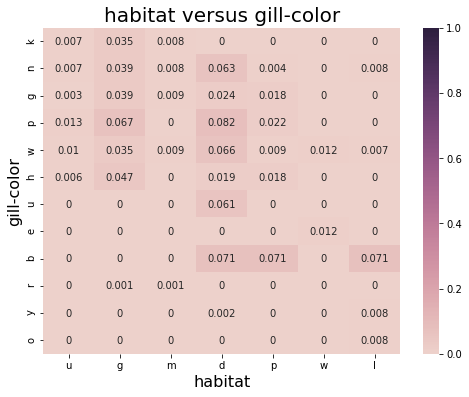

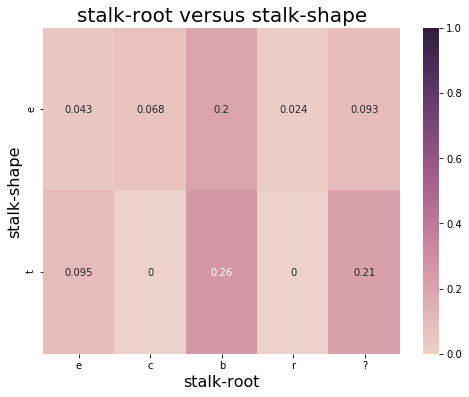

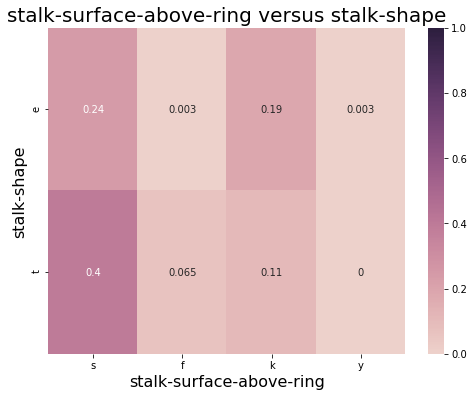

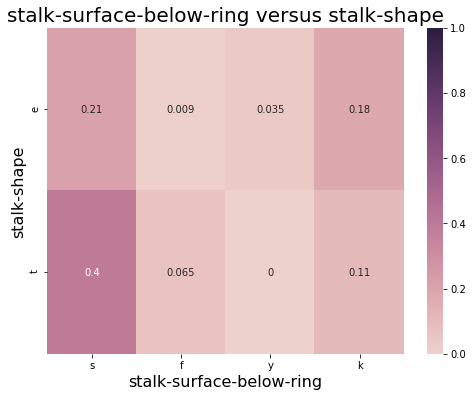

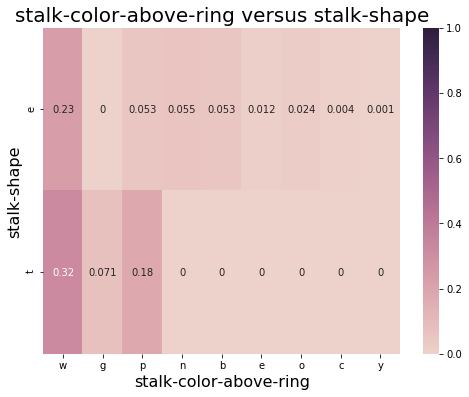

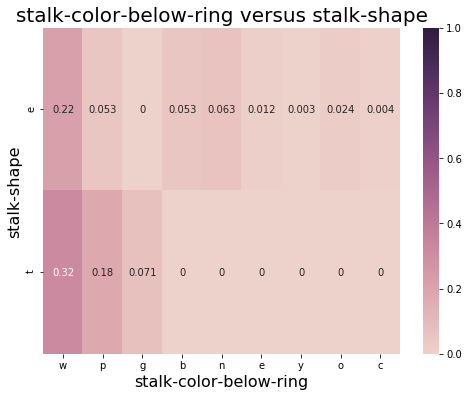

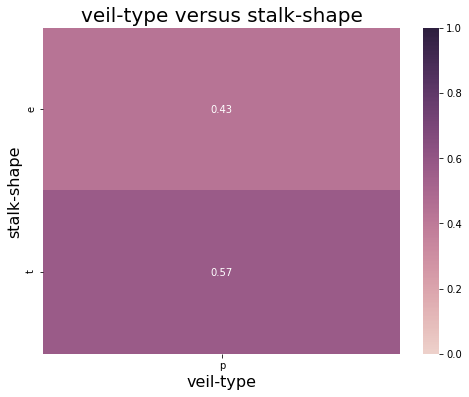

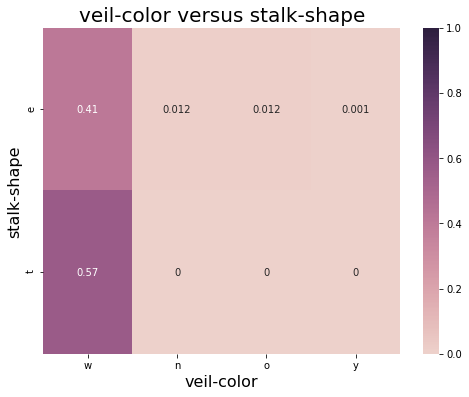

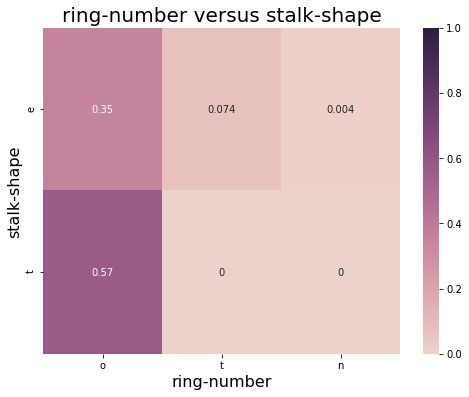

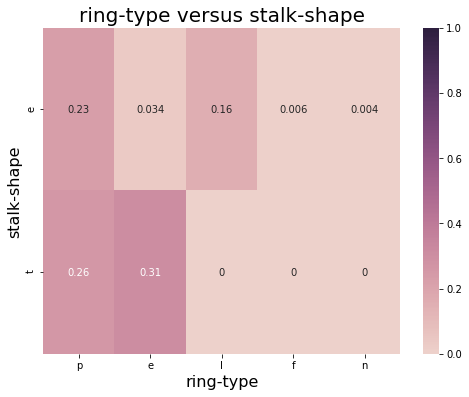

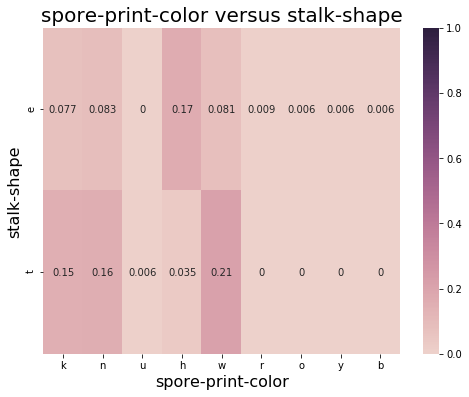

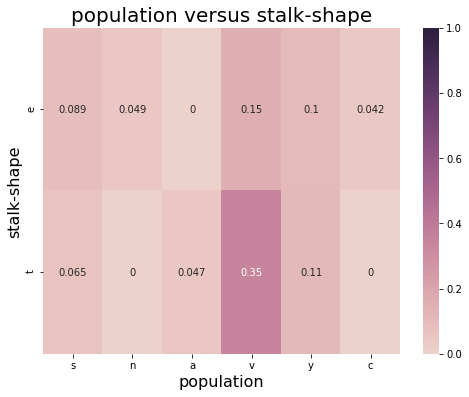

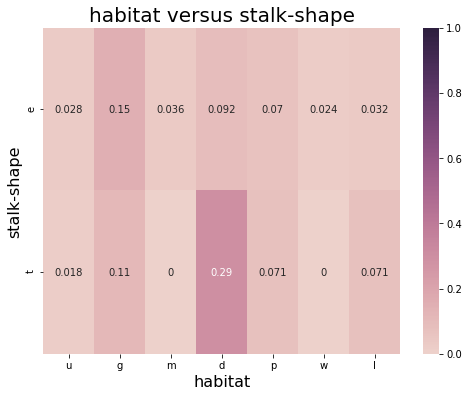

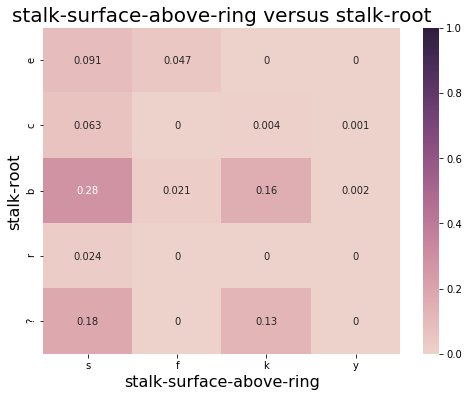

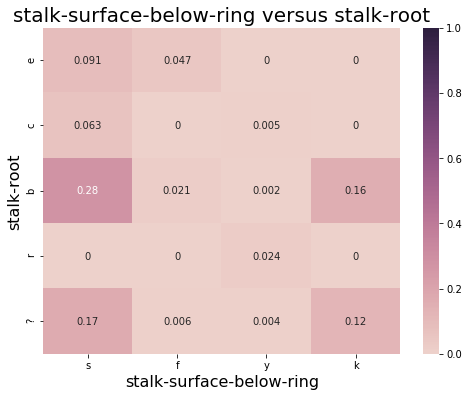

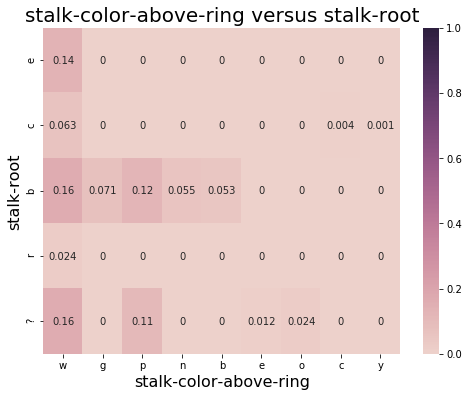

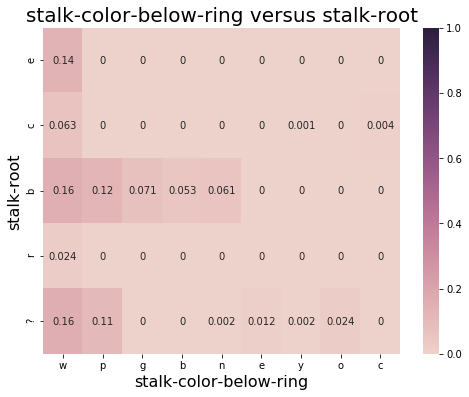

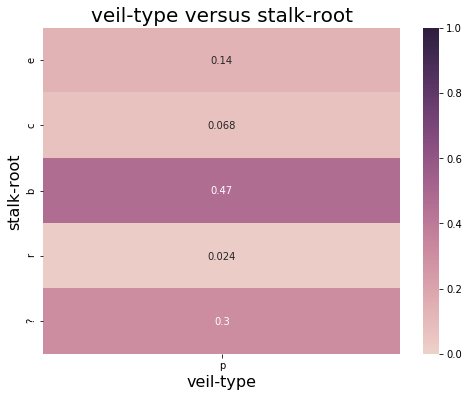

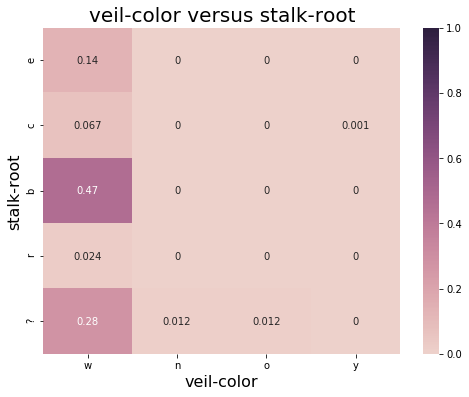

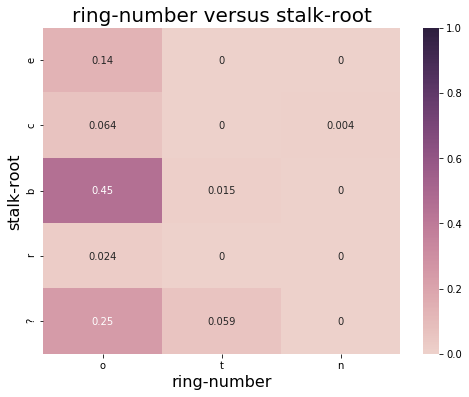

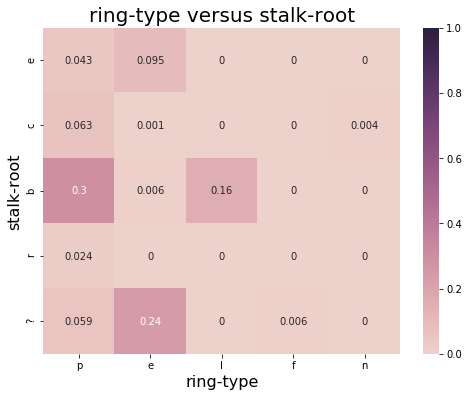

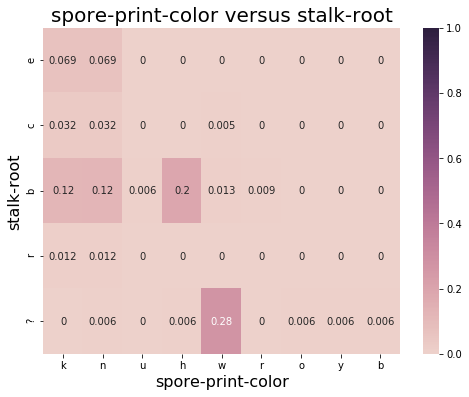

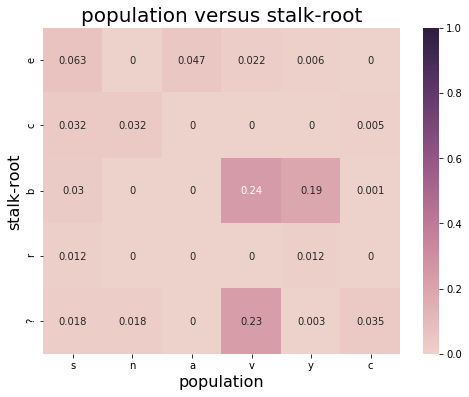

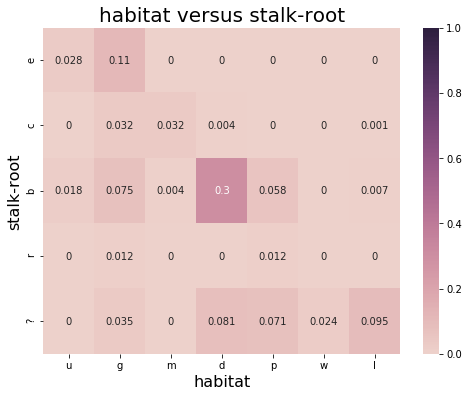

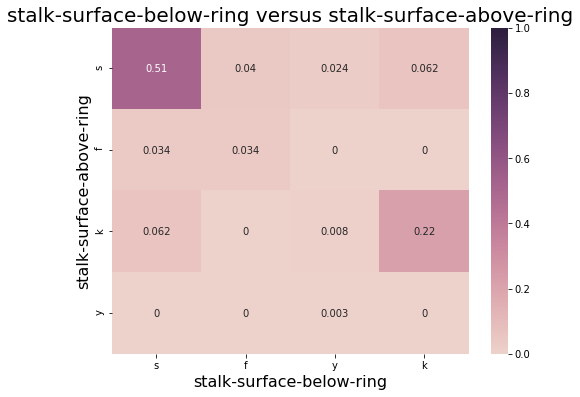

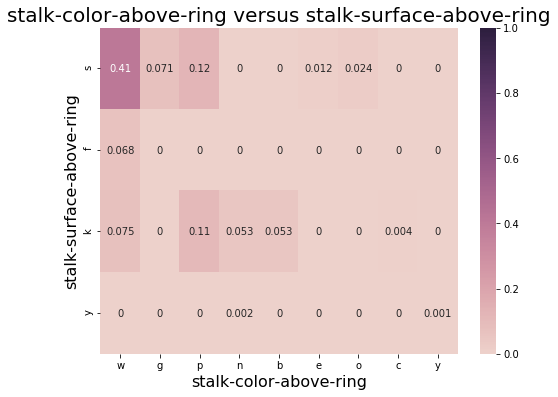

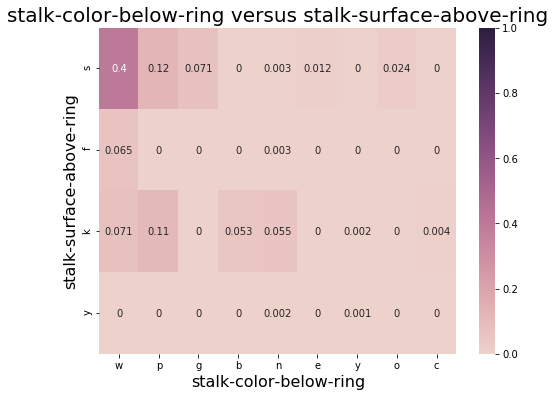

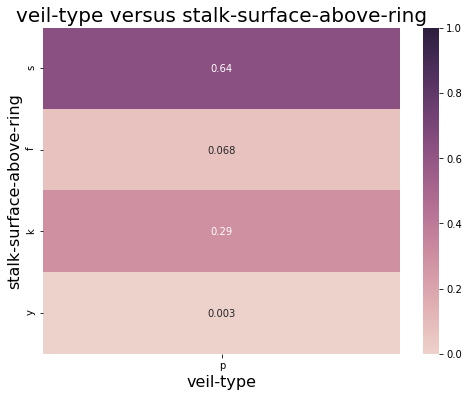

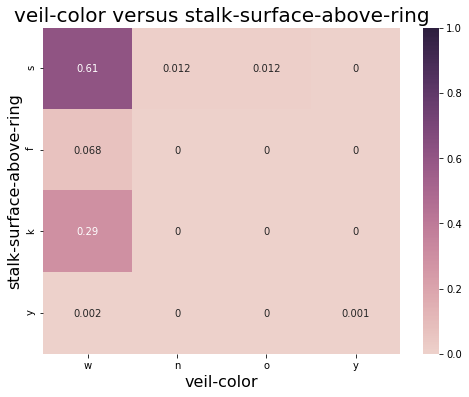

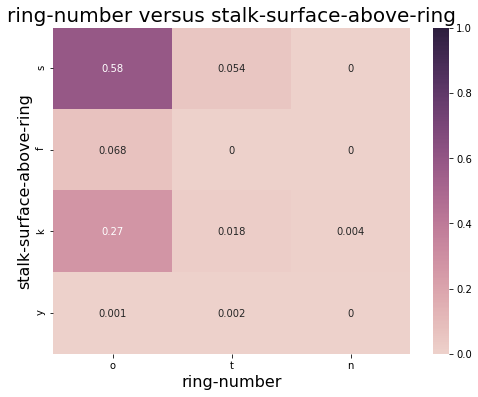

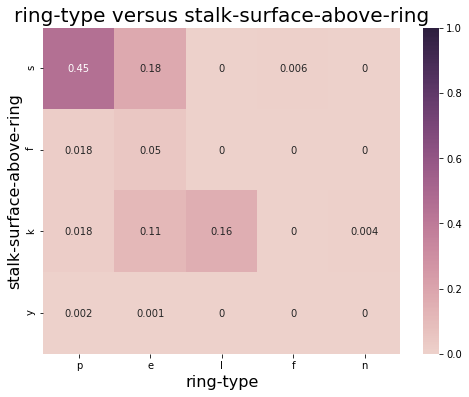

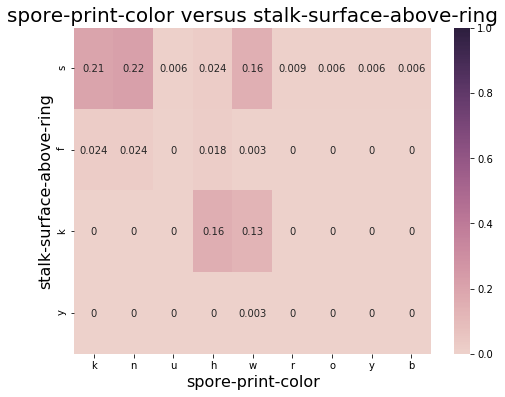

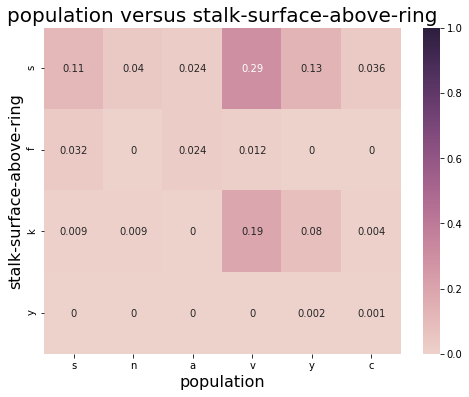

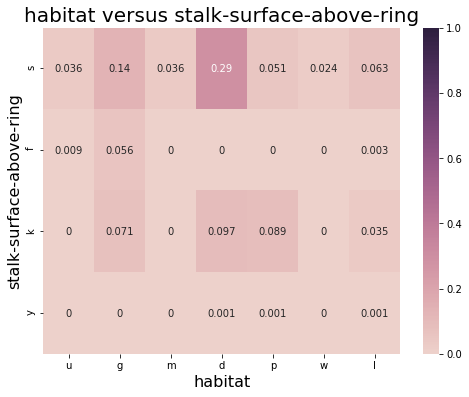

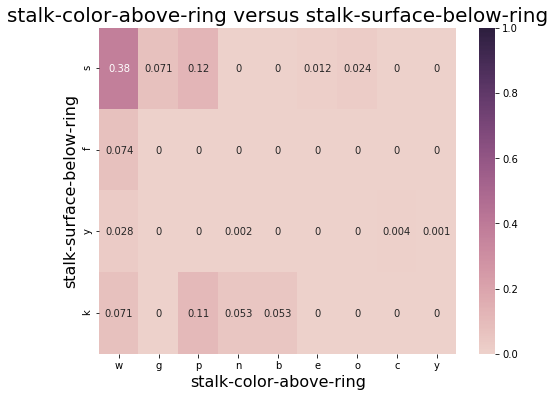

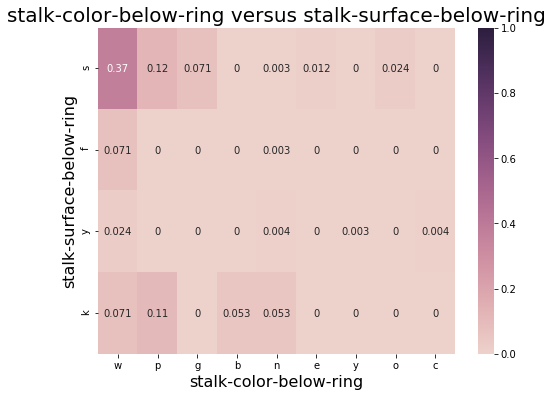

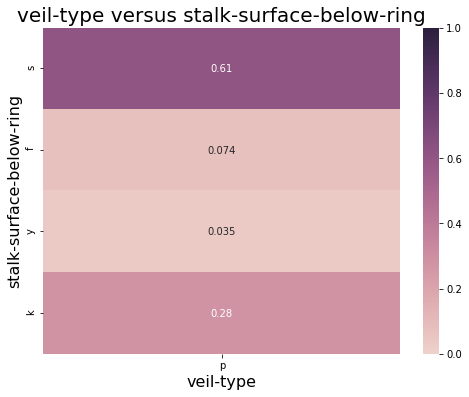

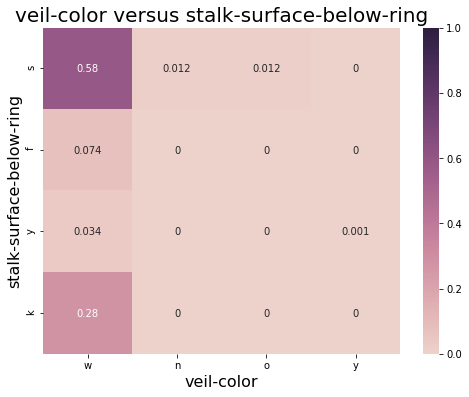

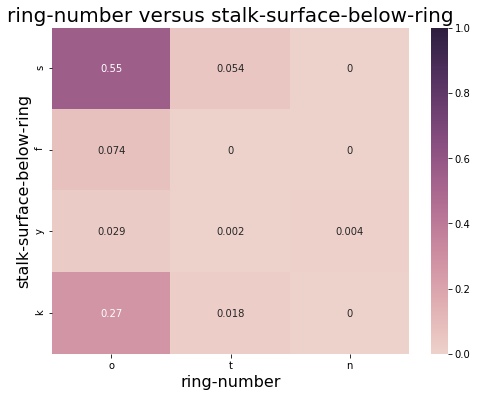

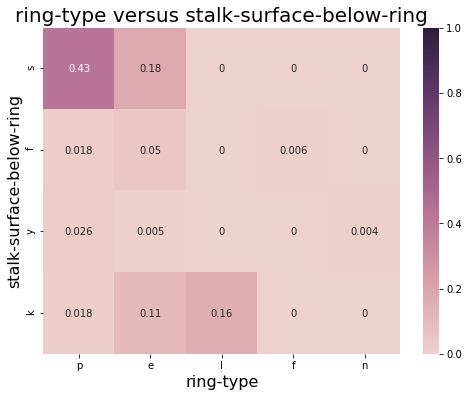

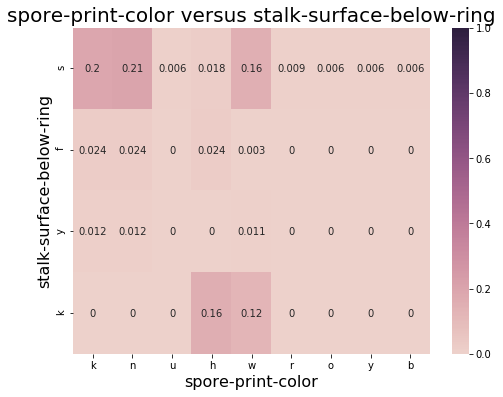

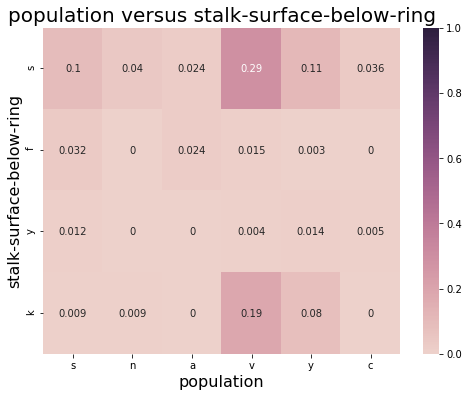

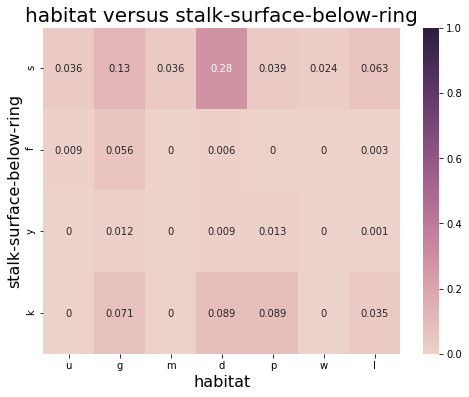

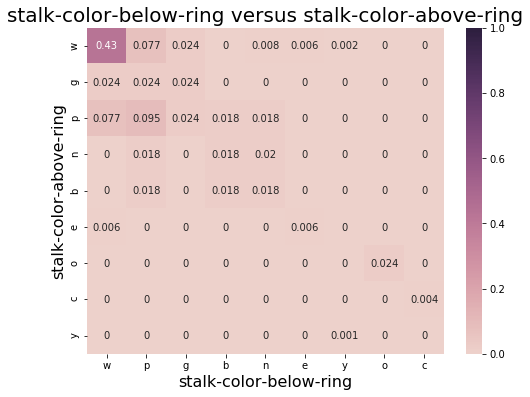

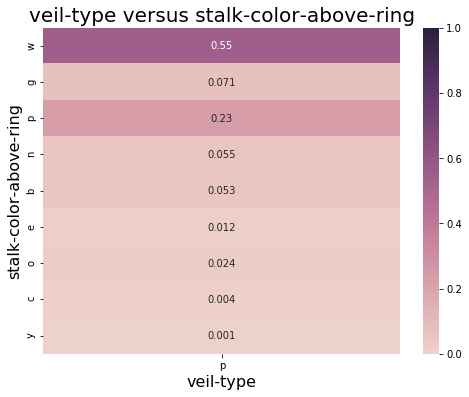

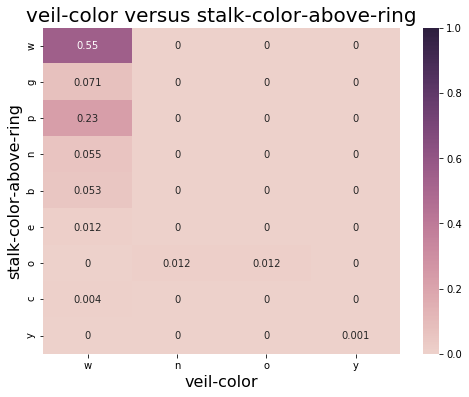

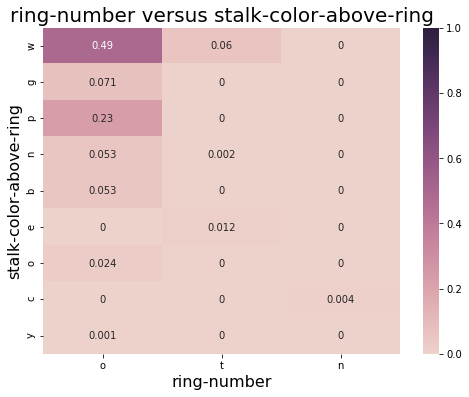

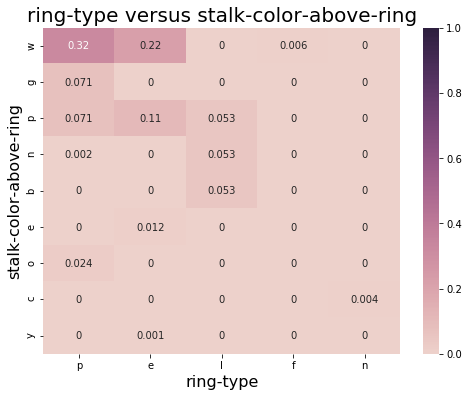

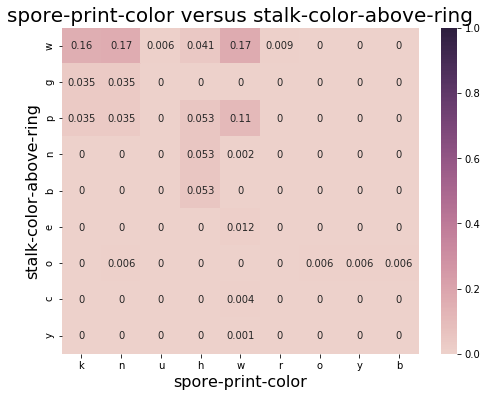

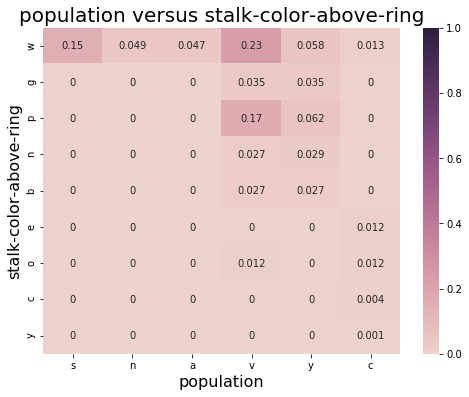

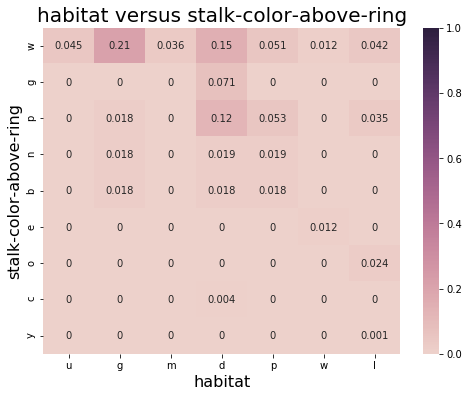

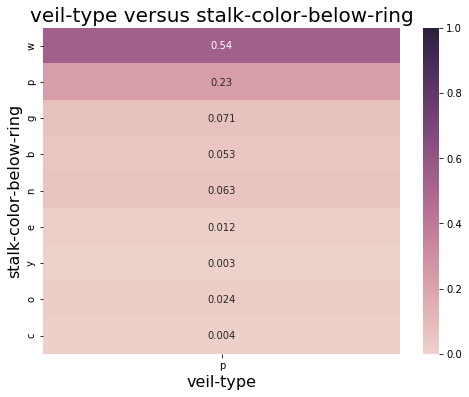

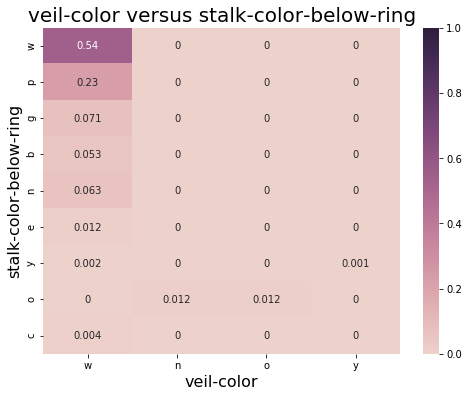

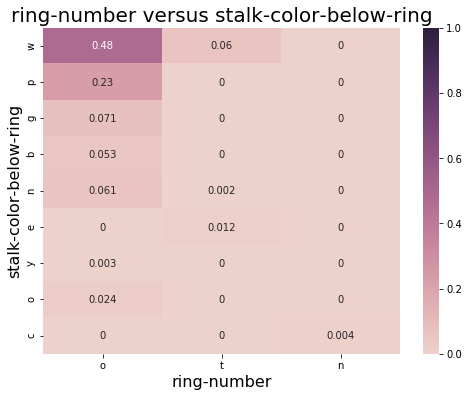

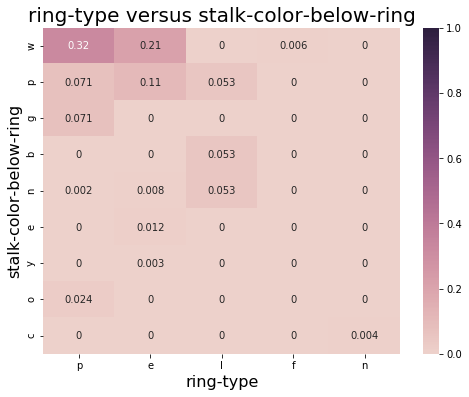

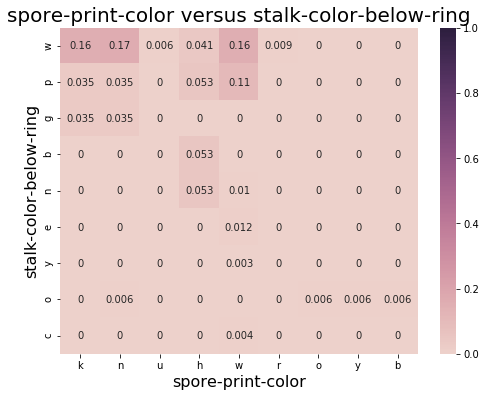

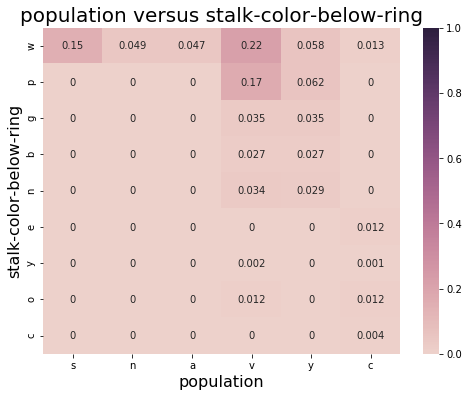

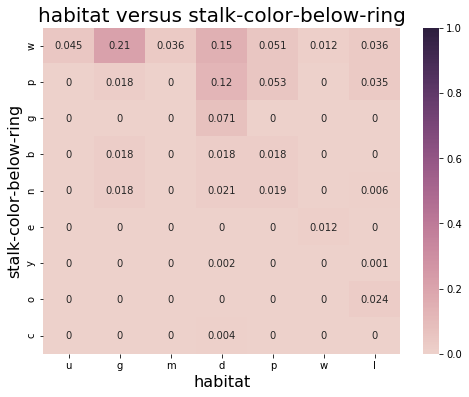

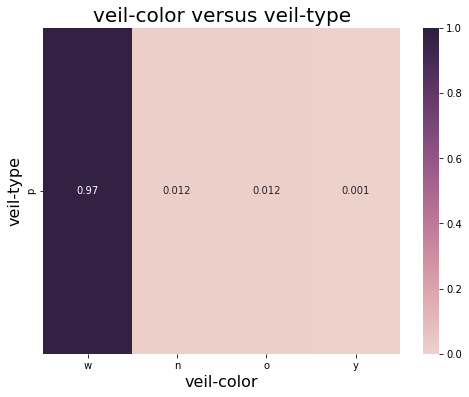

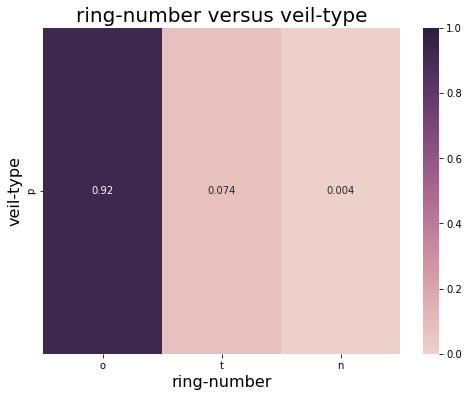

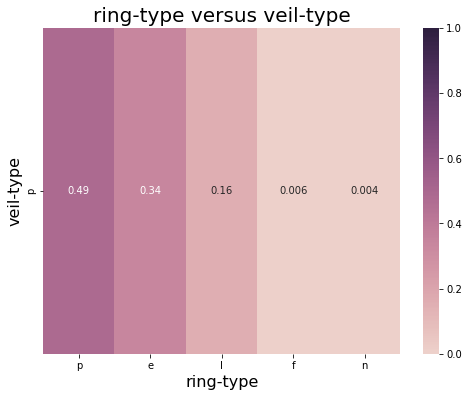

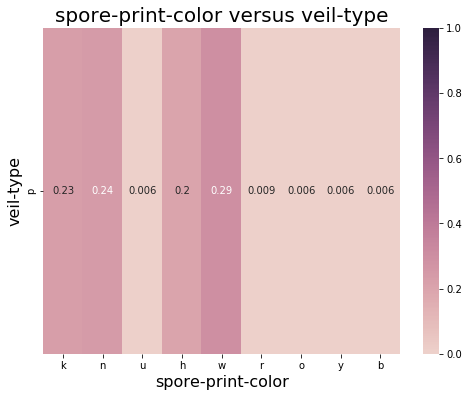

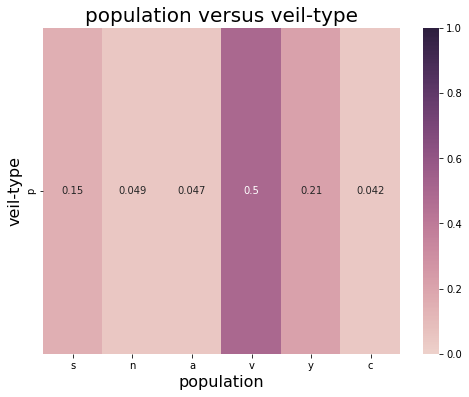

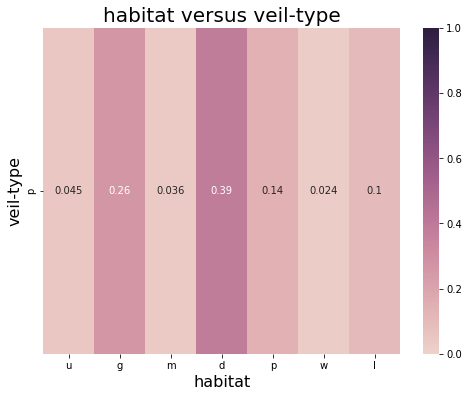

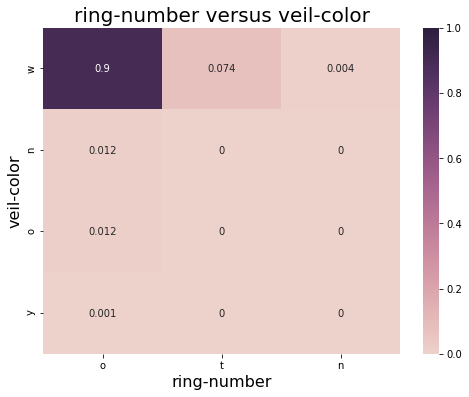

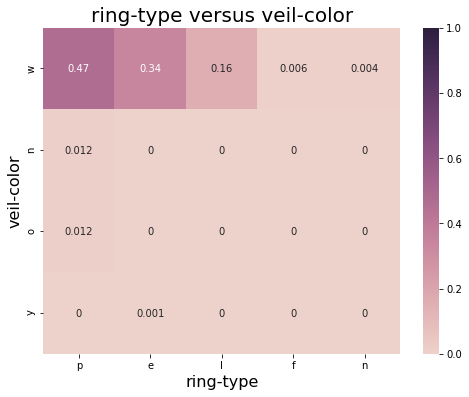

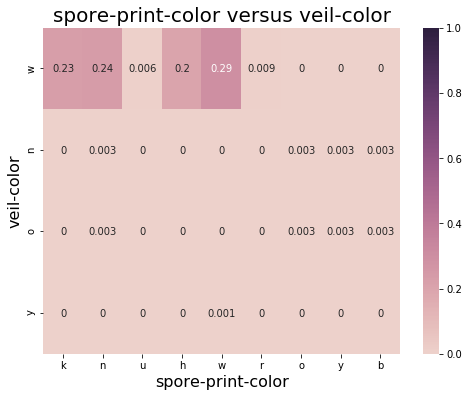

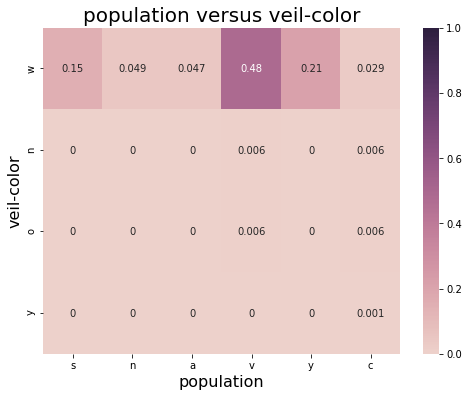

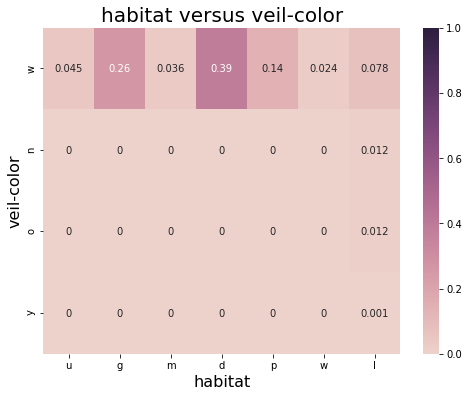

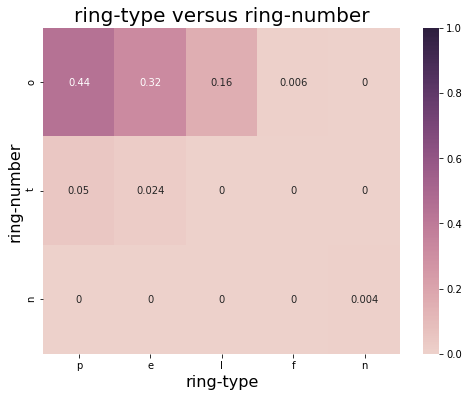

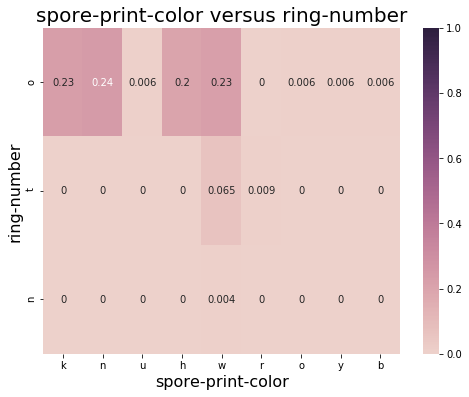

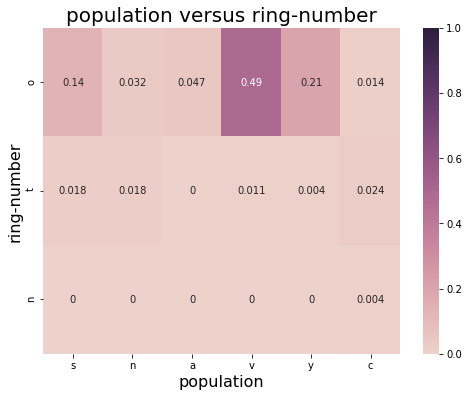

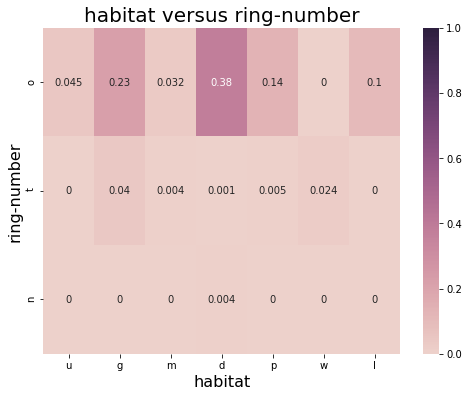

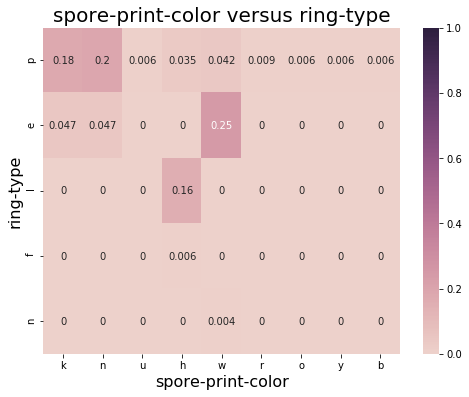

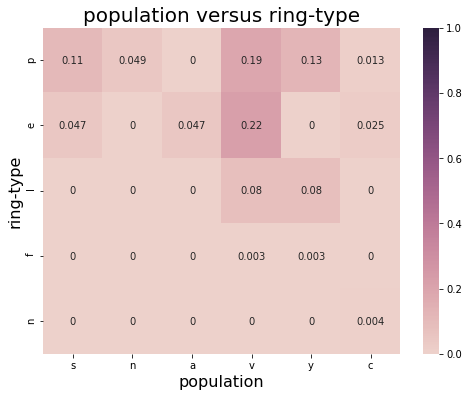

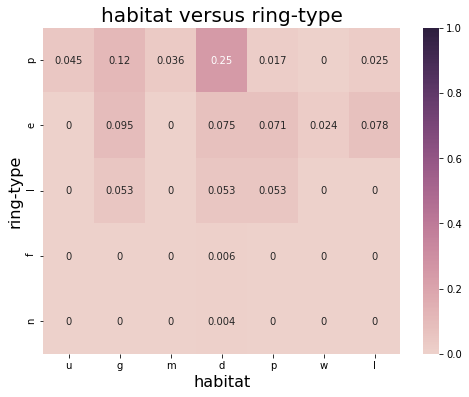

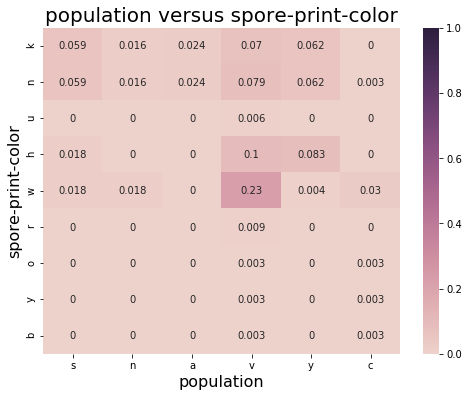

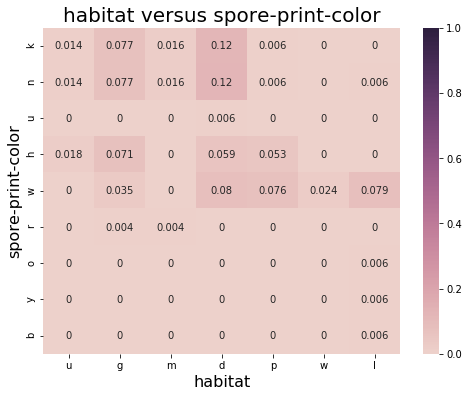

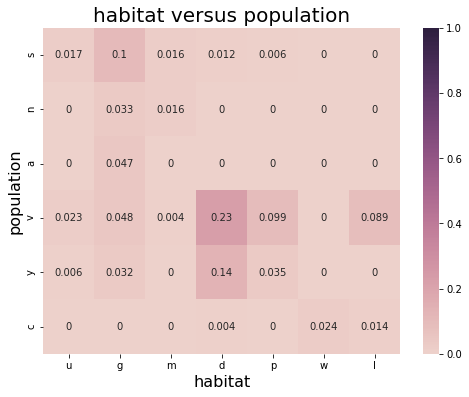

In [2]:
import pandas as pd
mushroom_data = pd.read_csv('mushrooms.csv')
heatmap(mushroom_data, save_figure=True)